## Müşteri Davranışlarına Göre Pazarlama Statejisi Analizi

- Tüketicilerin ürün veya hizmet satın alırken nasıl karar verdikleri kişisel, sosyal ve psikolojik olarak hangi parametrelerden etkilendikleri satış sonrası firmalardan beklentileri tüketicilerin davranışlarını belirlemektedir.
- İşletmeler pazarlama stratejilerini tüketicileri çeşitli gruplara ayırarak, davranışları benzerlik gösteren müşterilerine benzer stratejileri uygulayarak Pazar paylarını, marka değerlerini ve karlılıklarını arttırmaya
çalışmaktadırlar.

Müşterilerin davranışları, örneğin bir e ticaret şirketi için çok önemlidir. Eğer bu davranışları iyi analiz edebilirse daha iyi hizmet sunabilir ve büyüme hızı artar.

Geçmiş pazarlama verilerinin analizi süreci kolaylaştırır. "Bir müşteri davranışı verisinden şirket için iyi bir pazarlama kampanyası nasıl yapılmalı?" sorusunu baz aldım. Şirketin pazarlama kampanyasını tahmimine yönelik bir model geliştirmek istiyorum.

- Problem: Şirketin pazarlama faaliyetlerinden elde ettiği gelir, harcadığı miktardan daha düşüktür. Müşteri davranışları gözlemlenerek uygun kampanyalar, uygun müşterilere sunulması sağlanmalıdır.

- Amaçlar: 
 - Veri Seti Özetleme
 - Veri Temizleme
 - Veri Ön işleme
 - Veri Görselleştirme
 - Son kampanaya yönelik tahmin modelleri oluşturma
 - Müşteri davranışlarına göre clustering yapma
 - Modelleri Analiz Etme

In [490]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np 

## Veri Seti Tanımlama

In [491]:

customer_df = pd.read_csv("marketing_campaign_data.csv")

# Veri çerçevesinin boyutları yazdırıldı
customer_df.shape



(2240, 30)

In [492]:
customer_df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


## Dataset Summary

In [493]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [494]:
customer_df.describe()

,Unnamed: 0,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1119.500000,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,646.776623,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,559.750000,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1119.500000,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1679.250000,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Data Cleaning

### 1) Handling Missing Value

In [495]:
customer_df = customer_df.dropna(subset=['Income'])


In [496]:
customer_df.shape

(2216, 30)

### 2) Rename Variables

In [497]:
#Değişken isimleri gözlemlenebilirlik açısından daha basit hale getirildi
customer_df = customer_df.rename(columns={
    'MntWines': 'Wines',
    'MntCoke':'Coke',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold',
    'Response': 'AcceptedCmp6'
})



In [498]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2216 non-null   int64  
 1   ID                   2216 non-null   int64  
 2   Year_Birth           2216 non-null   int64  
 3   Education            2216 non-null   object 
 4   Marital_Status       2216 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2216 non-null   int64  
 7   Teenhome             2216 non-null   int64  
 8   Dt_Customer          2216 non-null   object 
 9   Recency              2216 non-null   int64  
 10  Coke                 2216 non-null   int64  
 11  Fruits               2216 non-null   int64  
 12  Meat                 2216 non-null   int64  
 13  Fish                 2216 non-null   int64  
 14  Sweets               2216 non-null   int64  
 15  Gold                 2216 non-null   int64 

- menikah: evli
- cerai: boşanmış
- Bertunangan: nişanlı
- janda: dul
- Duda: dul


In [499]:

print("Before:")
print(customer_df['Marital_Status'].unique())

Before:
['Lajang' 'Bertunangan' 'Menikah' 'Cerai' 'Janda' 'Duda']


In [500]:
# Belirli kategorik değerler başka değerlerle değiştirildi
customer_df['Marital_Status'].replace({"Bertunangan": "engaged", 
                                       "Cerai": "divorced", 
                                       "Menikah": "married", 
                                       "Janda": "widow",
                                       "Duda": "widow"
                                       }, inplace=True)

print("\nAfter:")
print(customer_df['Marital_Status'].unique())


After:
['Lajang' 'engaged' 'married' 'divorced' 'widow']


In [501]:
#Education
print("Before:")
print(customer_df['Education'].unique())

Before:
['S1' 'S3' 'S2' 'SMA' 'D3']


In [502]:
#SMA: Üç yıllık Lise, s1: Dört Yıllık Üniversite, s2: yüksek lisans, s3: doktora, d3: Meslek Yüksekokulu
customer_df['Education'].replace({"SMA": "High School", 
                                       "S1": "bachelor", 
                                       "S2": "master degree", 
                                       "S3": "doctor's degree",
                                       "D3": "junior technical college"
                                       }, inplace=True)

print("\nAfter:")
print(customer_df['Education'].unique())


After:
['bachelor' "doctor's degree" 'master degree' 'High School'
 'junior technical college']


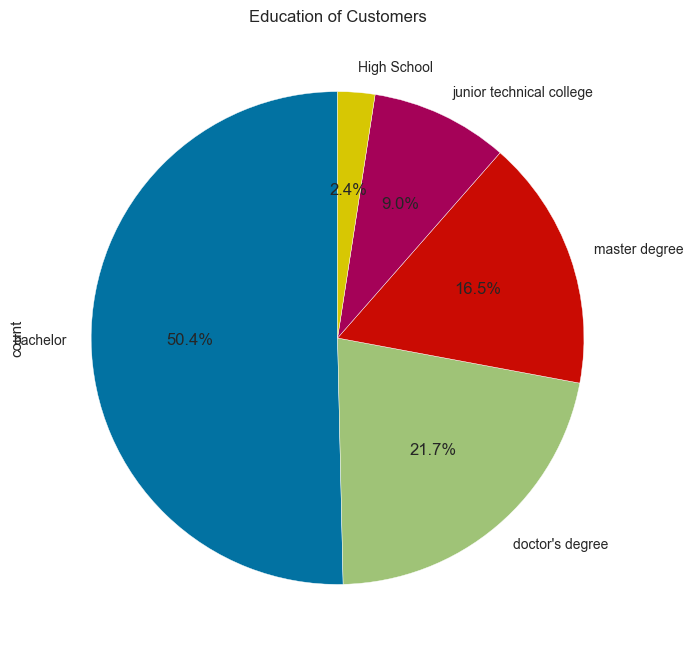

In [503]:
#Müşteri eğitim seviyeleri görselleştirildi
plt.figure(figsize=(8, 8))
customer_df['Education'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Education of Customers')
plt.show()

### 3) Remove Unused

In [504]:
#Kullanılmayacak değerler düzenlendi
columns_to_remove = ['ID', 'Z_CostContact', 'Z_Revenue']
customer_df = customer_df.drop(columns=columns_to_remove)

In [505]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   Coke                 2216 non-null   int64  
 10  Fruits               2216 non-null   int64  
 11  Meat                 2216 non-null   int64  
 12  Fish                 2216 non-null   int64  
 13  Sweets               2216 non-null   int64  
 14  Gold                 2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

### 4) Create New Columns

Age

In [506]:
# Yeni 'Age' sütunu oluşturuldu
customer_df['Age'] = 2024 - customer_df['Year_Birth']

# 'Year_Birth' sütunu oluşturuldu
customer_df = customer_df.drop(columns=['Year_Birth'])

In [507]:
customer_df['Age'].head(10)

0    67
1    70
2    59
3    40
4    43
5    57
6    53
7    39
8    50
9    74
Name: Age, dtype: int64

In [508]:
# Yaş grupları için fonksiyon oluşturuldu
def ages(x):
    if x <= 35:
        group = 'Young Adult'
    elif x > 35 and x <= 40:
        group = 'Adult'
    elif x > 40 and x <= 55:
        group = 'Middle Age'
    elif x > 55 and x <= 65:
        group = 'Senior'
    else:
        group = 'Elderly'
    
    return group

In [509]:
customer_df['Age_Group'] = customer_df.apply(lambda x: ages(x['Age']), axis = 1)

In [510]:
customer_df['Age_Group']

0          Elderly
1          Elderly
2           Senior
3            Adult
4       Middle Age
           ...    
2235        Senior
2236       Elderly
2237    Middle Age
2238       Elderly
2239       Elderly
Name: Age_Group, Length: 2216, dtype: object

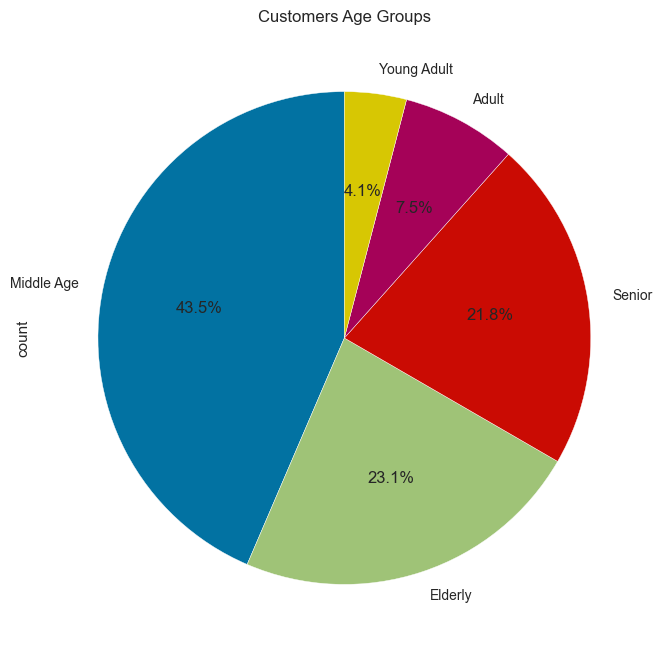

In [511]:
#Müşteri yaş grupları görselleştirildi
plt.figure(figsize=(8, 8))
customer_df['Age_Group'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Customers Age Groups')
plt.show()

Number Of Day

In [512]:
#Datetime dönüşümü yapıldı
customer_df['Dt_CustomerCovert1'] = pd.to_datetime(customer_df['Dt_Customer'], format='%d-%m-%Y')

#Şimdiki zaman çıkarılarak geçen süreleri içeren değişken oluşturuldu
customer_df['Dt_CustomerCovert2'] = pd.to_datetime("2024-01-18") - customer_df['Dt_CustomerCovert1']

#Gün cinsi verileri içeren bir değişken oluşturuldu
customer_df['NumberofDay'] = customer_df['Dt_CustomerCovert2'].dt.days

#Gün cinsi dışındakiler remove yapıldı
columns_to_remove = ['Dt_Customer', 'Dt_CustomerCovert1', 'Dt_CustomerCovert2']
customer_df = customer_df.drop(columns=columns_to_remove)

print(customer_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Recency              2216 non-null   int64  
 7   Coke                 2216 non-null   int64  
 8   Fruits               2216 non-null   int64  
 9   Meat                 2216 non-null   int64  
 10  Fish                 2216 non-null   int64  
 11  Sweets               2216 non-null   int64  
 12  Gold                 2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   int64 

In [513]:
customer_df['NumberofDay']

0       4153
1       3603
2       3802
3       3629
4       3651
        ... 
2235    3871
2236    3509
2237    3645
2238    3646
2239    4112
Name: NumberofDay, Length: 2216, dtype: int64

Total Spend

In [514]:
#Ürün türlerine göre satışlar göz önüne alınarak toplam harcama tutarı belirlendi
customer_df['TotalSpentAmount'] = (
    + customer_df['Fruits'] +
    customer_df['Meat'] + customer_df['Fish'] +
    customer_df['Sweets'] + customer_df['Gold']
)

In [515]:
customer_df['TotalSpentAmount']

0       982000
1        16000
2       350000
3        42000
4       249000
         ...  
2235    632000
2236     38000
2237    333000
2238    415000
2239     88000
Name: TotalSpentAmount, Length: 2216, dtype: int64

Family

In [516]:
customer_df['Marital_Status']

0         Lajang
1         Lajang
2        engaged
3        engaged
4        married
          ...   
2235     married
2236     engaged
2237    divorced
2238     engaged
2239     married
Name: Marital_Status, Length: 2216, dtype: object

In [517]:
#Müşteri çocuklarına göre family size oluşturuldu
customer_df['Partner'] = customer_df['Marital_Status'].isin(['Married', 'Together']).astype(int)
customer_df['FamilySize'] = customer_df['Partner'] + customer_df['Teenhome'] + customer_df['Kidhome']
customer_df = customer_df.drop(columns=['Partner'])

In [518]:
customer_df


,Unnamed: 0,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age,Age_Group,NumberofDay,TotalSpentAmount,FamilySize
0,0,bachelor,Lajang,58138000.0,0,0,58,635000,88000,546000,...,0,0,0,0,1,67,Elderly,4153,982000,0
1,1,bachelor,Lajang,46344000.0,1,1,38,11000,1000,6000,...,0,0,0,0,0,70,Elderly,3603,16000,2
2,2,bachelor,engaged,71613000.0,0,0,26,426000,49000,127000,...,0,0,0,0,0,59,Senior,3802,350000,0
3,3,bachelor,engaged,26646000.0,1,0,26,11000,4000,20000,...,0,0,0,0,0,40,Adult,3629,42000,1
4,4,doctor's degree,married,58293000.0,1,0,94,173000,43000,118000,...,0,0,0,0,0,43,Middle Age,3651,249000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,bachelor,married,61223000.0,0,1,46,709000,43000,182000,...,0,0,0,0,0,57,Senior,3871,632000,1
2236,2236,doctor's degree,engaged,64014000.0,2,1,56,406000,0,30000,...,0,1,0,0,0,78,Elderly,3509,38000,3
2237,2237,bachelor,divorced,56981000.0,0,0,91,908000,48000,217000,...,0,0,0,0,0,43,Middle Age,3645,333000,0
2238,2238,master degree,engaged,69245000.0,0,1,8,428000,30000,214000,...,0,0,0,0,0,68,Elderly,3646,415000,1


In [519]:
#Toplam kabul edilen kampanyalara göre değişken oluşturuldu
customer_df['TotalAcceptedCmp'] = customer_df['AcceptedCmp1'] + customer_df['AcceptedCmp2'] + customer_df['AcceptedCmp3'] + customer_df['AcceptedCmp4'] + customer_df['AcceptedCmp5'] + customer_df['AcceptedCmp6']

In [520]:
customer_df

,Unnamed: 0,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,...,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age,Age_Group,NumberofDay,TotalSpentAmount,FamilySize,TotalAcceptedCmp
0,0,bachelor,Lajang,58138000.0,0,0,58,635000,88000,546000,...,0,0,0,1,67,Elderly,4153,982000,0,1
1,1,bachelor,Lajang,46344000.0,1,1,38,11000,1000,6000,...,0,0,0,0,70,Elderly,3603,16000,2,0
2,2,bachelor,engaged,71613000.0,0,0,26,426000,49000,127000,...,0,0,0,0,59,Senior,3802,350000,0,0
3,3,bachelor,engaged,26646000.0,1,0,26,11000,4000,20000,...,0,0,0,0,40,Adult,3629,42000,1,0
4,4,doctor's degree,married,58293000.0,1,0,94,173000,43000,118000,...,0,0,0,0,43,Middle Age,3651,249000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2235,bachelor,married,61223000.0,0,1,46,709000,43000,182000,...,0,0,0,0,57,Senior,3871,632000,1,0
2236,2236,doctor's degree,engaged,64014000.0,2,1,56,406000,0,30000,...,1,0,0,0,78,Elderly,3509,38000,3,1
2237,2237,bachelor,divorced,56981000.0,0,0,91,908000,48000,217000,...,0,0,0,0,43,Middle Age,3645,333000,0,1
2238,2238,master degree,engaged,69245000.0,0,1,8,428000,30000,214000,...,0,0,0,0,68,Elderly,3646,415000,1,0


In [521]:
# NumOfferAccepted1 ve NumOfferAccepted2 sütunları oluşturuldu
#Tüm kampanyalara olan geri dönüşü
customer_df['NumOfferAccepted1'] = (
    customer_df['AcceptedCmp1'] + customer_df['AcceptedCmp2'] +
    customer_df['AcceptedCmp3'] + customer_df['AcceptedCmp4'] +
    customer_df['AcceptedCmp5'] + customer_df['AcceptedCmp6']
)
#İlk beş kampanya geri dönüşü
customer_df['NumOfferAccepted2'] = (
    customer_df['AcceptedCmp1'] + customer_df['AcceptedCmp2'] +
    customer_df['AcceptedCmp3'] + customer_df['AcceptedCmp4'] +
    customer_df['AcceptedCmp5']
)
customer_df['NumOfferAccepted1']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: NumOfferAccepted1, Length: 2216, dtype: int64

In [522]:
#Müşteri ebeveyn mi?
customer_df['IsParent'] = customer_df['Kidhome'].gt(0) | customer_df['Teenhome'].gt(0)
customer_df['IsParent'] = customer_df['IsParent'].astype(int)

### 5) Categoric variables

In [523]:
# Eğitim ve Medeni Hali değişkenler kategoriye dönüştürüldü
customer_df['Education'] = customer_df['Education'].astype('category')
customer_df['Marital_Status'] = customer_df['Marital_Status'].astype('category')

In [524]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           2216 non-null   int64   
 1   Education            2216 non-null   category
 2   Marital_Status       2216 non-null   category
 3   Income               2216 non-null   float64 
 4   Kidhome              2216 non-null   int64   
 5   Teenhome             2216 non-null   int64   
 6   Recency              2216 non-null   int64   
 7   Coke                 2216 non-null   int64   
 8   Fruits               2216 non-null   int64   
 9   Meat                 2216 non-null   int64   
 10  Fish                 2216 non-null   int64   
 11  Sweets               2216 non-null   int64   
 12  Gold                 2216 non-null   int64   
 13  NumDealsPurchases    2216 non-null   int64   
 14  NumWebPurchases      2216 non-null   int64   
 15  NumCatalogPurchases  2216 

### 6) Outliers

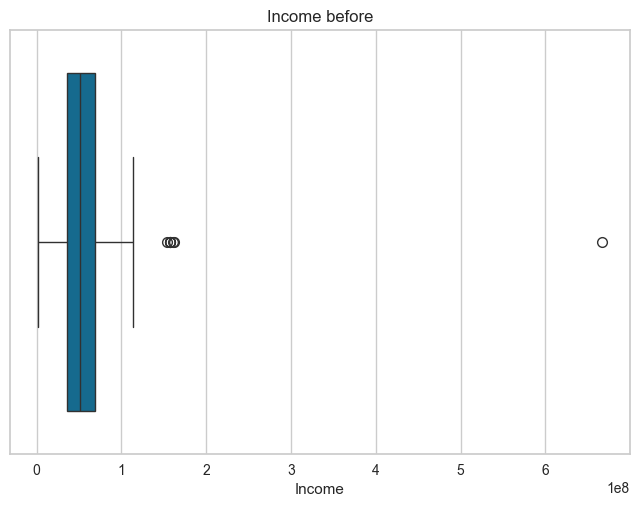

In [525]:
sns.boxplot(x='Income', data=customer_df)
plt.title('Income before')
plt.show()

In [526]:
customer_df['Income'].max()

666666000.0

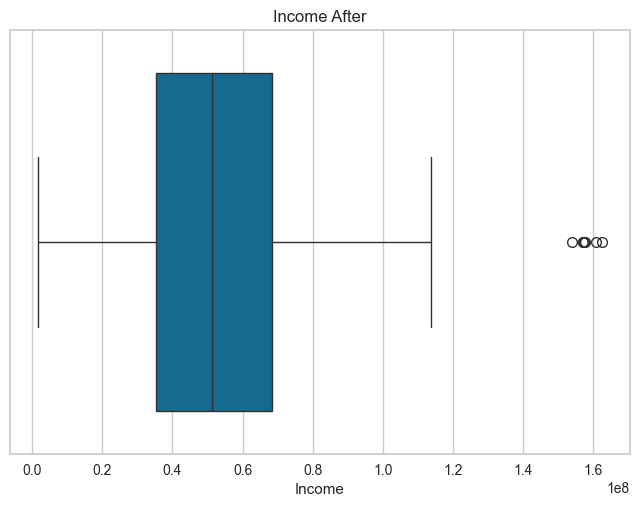

In [527]:
outliers = customer_df[customer_df['Income'] == 666666000]
customer_df = customer_df[customer_df['Income'] != 666666000]

sns.boxplot(x='Income', data=customer_df)
plt.title('Income After')
plt.show()

In [528]:
# Meat 
customer_df['Meat'].describe()

count    2.215000e+03
mean     1.670632e+05
std      2.243116e+05
min      0.000000e+00
25%      1.600000e+04
50%      6.800000e+04
75%      2.325000e+05
max      1.725000e+06
Name: Meat, dtype: float64

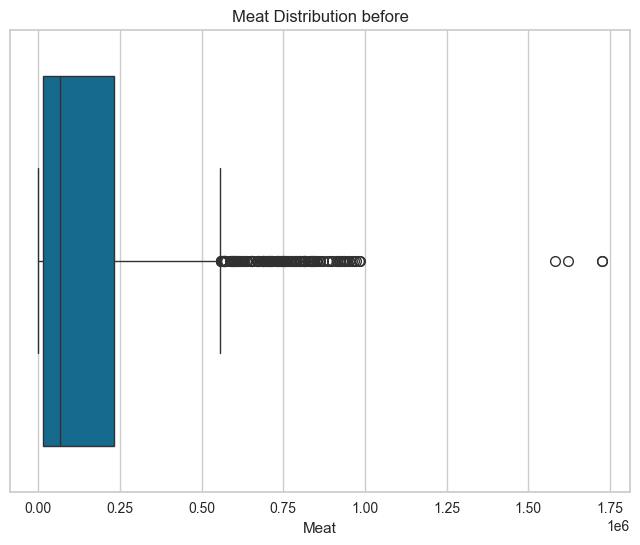

In [529]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Meat', data=customer_df)
plt.title('Meat Distribution before')
plt.show()

In [530]:
outliers = customer_df[customer_df['Meat'] > 1500000]
customer_df = customer_df[customer_df['Meat'] <= 1500000]

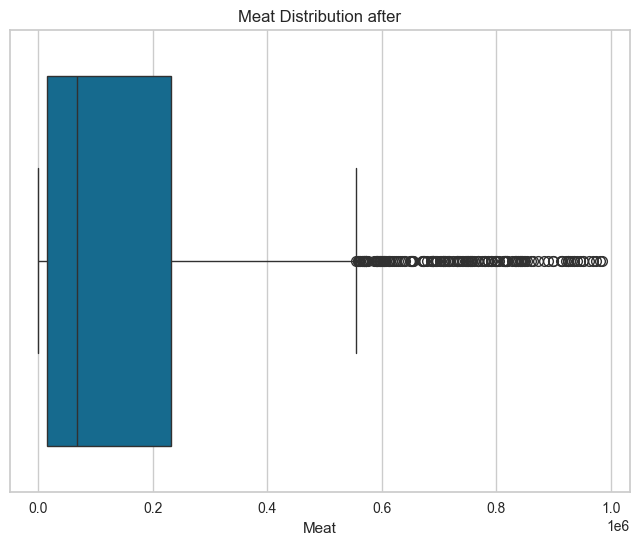

In [531]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Meat', data=customer_df)
plt.title('Meat Distribution after')
plt.show()

In [532]:
#sweets
customer_df['Sweets']

0        88000
1         1000
2        21000
3         3000
4        27000
         ...  
2235    118000
2236         0
2237     12000
2238     30000
2239      1000
Name: Sweets, Length: 2211, dtype: int64

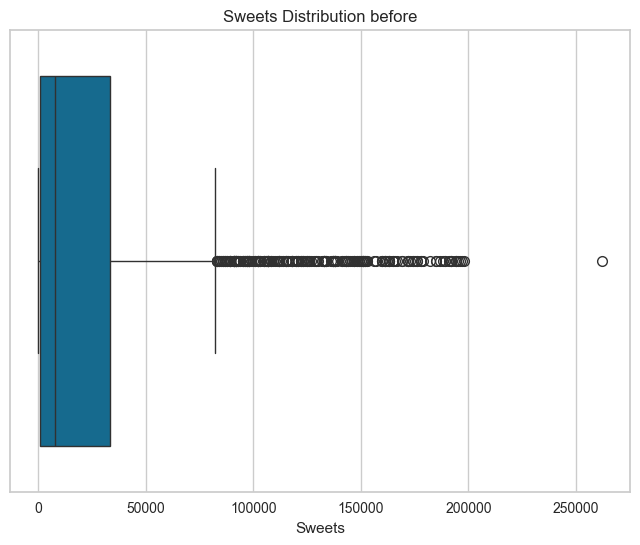

In [533]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sweets', data=customer_df)
plt.title('Sweets Distribution before')
plt.show()

In [534]:
outliers = customer_df[customer_df['Sweets'] > 230000]
customer_df = customer_df[customer_df['Sweets'] <= 220000]

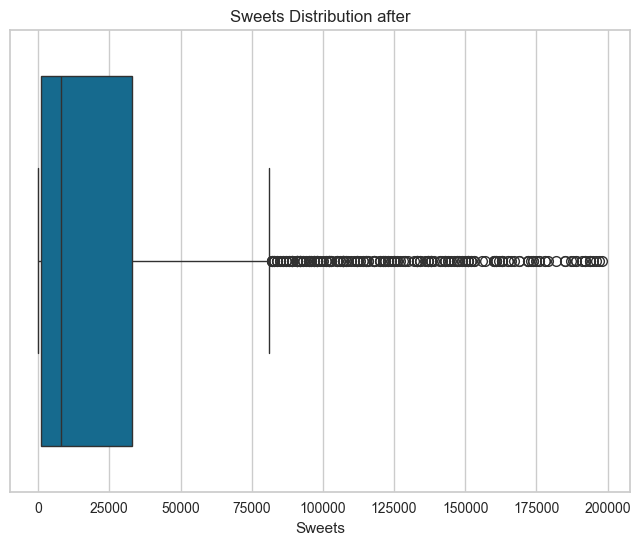

In [535]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sweets', data=customer_df)
plt.title('Sweets Distribution after')
plt.show()

In [536]:
#Gold
customer_df['Gold']

0        88000
1         6000
2        42000
3         5000
4        15000
         ...  
2235    247000
2236      8000
2237     24000
2238     61000
2239     21000
Name: Gold, Length: 2210, dtype: int64

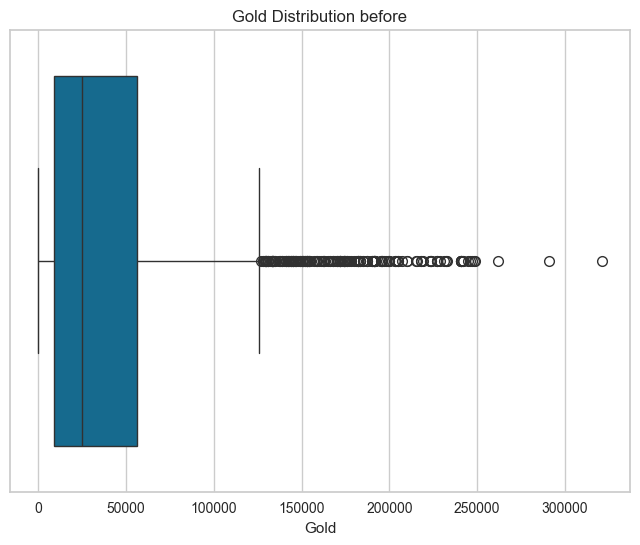

In [537]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gold', data=customer_df)
plt.title('Gold Distribution before')
plt.show()

In [538]:
outliers = customer_df[customer_df['Gold'] > 250000]
customer_df = customer_df[customer_df['Gold'] <= 250000]

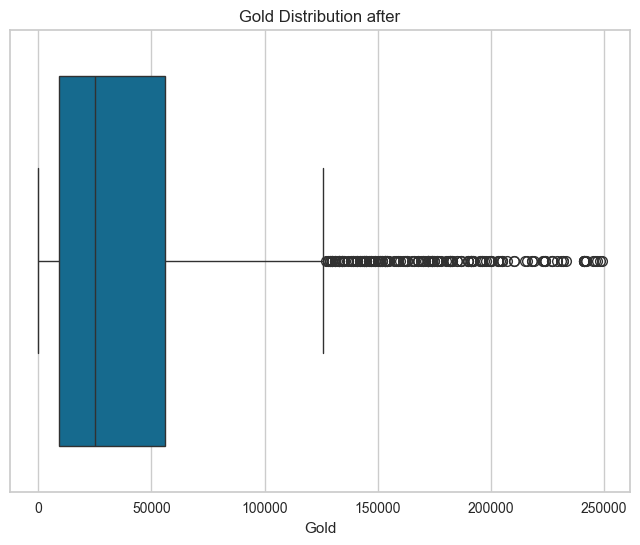

In [539]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gold', data=customer_df)
plt.title('Gold Distribution after')
plt.show()

In [540]:
#NumWebVisitsMonth
customer_df['NumWebVisitsMonth']

0       7
1       5
2       4
3       6
4       5
       ..
2235    5
2236    7
2237    6
2238    3
2239    7
Name: NumWebVisitsMonth, Length: 2207, dtype: int64

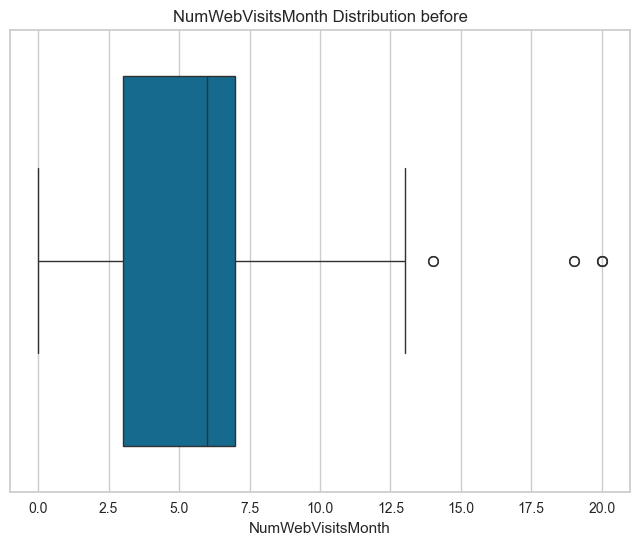

In [541]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='NumWebVisitsMonth', data=customer_df)
plt.title('NumWebVisitsMonth Distribution before')
plt.show()

In [542]:
outliers = customer_df['NumWebVisitsMonth'].quantile(0.75) + 1.5 * (customer_df['NumWebVisitsMonth'].quantile(0.75) - customer_df['NumWebVisitsMonth'].quantile(0.25))
customer_df = customer_df[customer_df['NumWebVisitsMonth'] <= outliers]

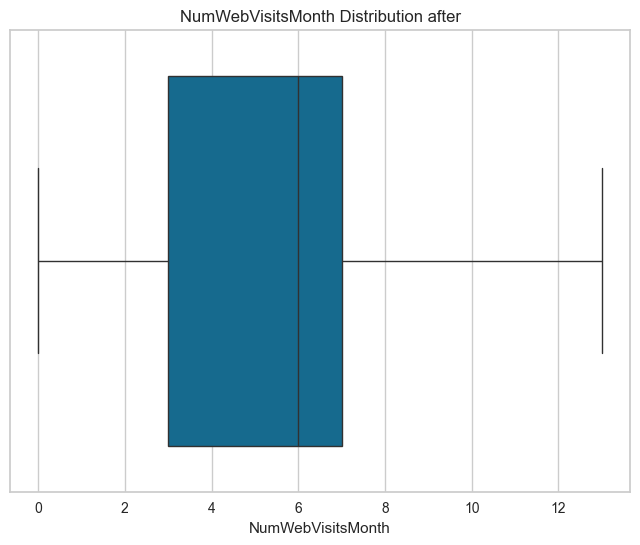

In [543]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='NumWebVisitsMonth', data=customer_df)
plt.title('NumWebVisitsMonth Distribution after')
plt.show()

In [544]:
# Age
customer_df['Age']

0       67
1       70
2       59
3       40
4       43
        ..
2235    57
2236    78
2237    43
2238    68
2239    70
Name: Age, Length: 2200, dtype: int64

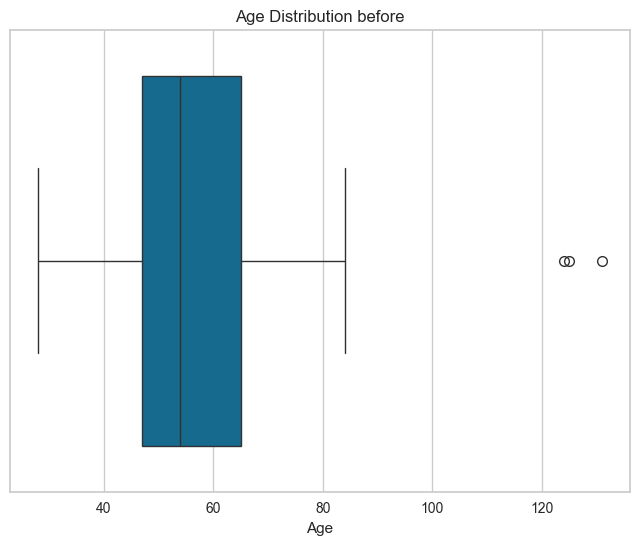

In [545]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=customer_df)
plt.title('Age Distribution before')
plt.show()

In [546]:
#Determine Outlier
Q1 = customer_df['Age'].quantile(0.25)
Q3 = customer_df['Age'].quantile(0.75)
IQR = Q3 - Q1
#Determine lower and upper bounder
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filtered outliers
customer_df = customer_df[(customer_df['Age'] >= lower_bound) & (customer_df['Age'] <= upper_bound)]



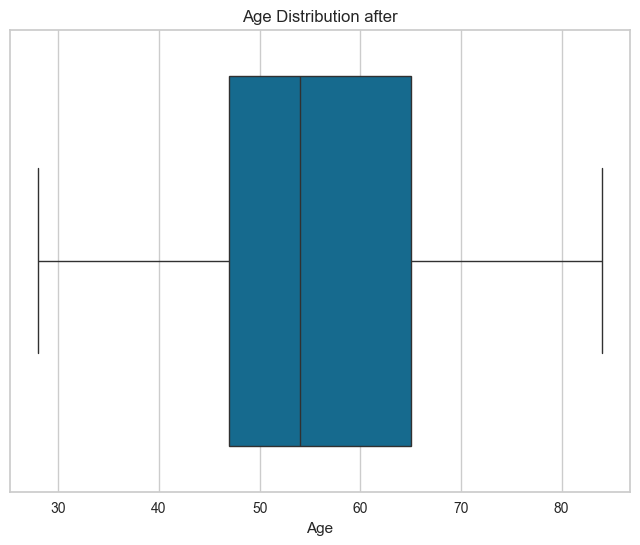

In [547]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', data=customer_df)
plt.title('Age Distribution after')
plt.show()

### Reduce categories 

In [548]:
# Marital_Status
MaritalStatfreq = pd.DataFrame(customer_df['Marital_Status'].value_counts()).reset_index()
MaritalStatfreq.columns = ['Marital_Status', 'Freq']

# Sıralama
MaritalStatfreq = MaritalStatfreq.sort_values(by='Freq', ascending=False)

print(MaritalStatfreq)

  Marital_Status  Freq
0        married   852
1        engaged   568
2         Lajang   469
3       divorced   229
4          widow    79


In [549]:
#Anlamsız olan bir marital status değeri other cinsine dönüştürüldü
filtered_marital_status = MaritalStatfreq[MaritalStatfreq['Freq'] / len(customer_df) > 0.05]

customer_df['Marital_Status'] = customer_df['Marital_Status'].apply(
    lambda x: x if x in ["divorced", "married", "engaged", "widow"] else "Other"
)



In [550]:
# Yeniden Marital_Status frekans tablosu oluşturuldu
MaritalStatfreq = pd.DataFrame(customer_df['Marital_Status'].value_counts()).reset_index()
MaritalStatfreq.columns = ['Marital_Status', 'Freq']
MaritalStatfreq = MaritalStatfreq.sort_values(by='Freq', ascending=False)
MaritalStatfreq

,Marital_Status,Freq
0,married,852
1,engaged,568
2,Other,469
3,divorced,229
4,widow,79


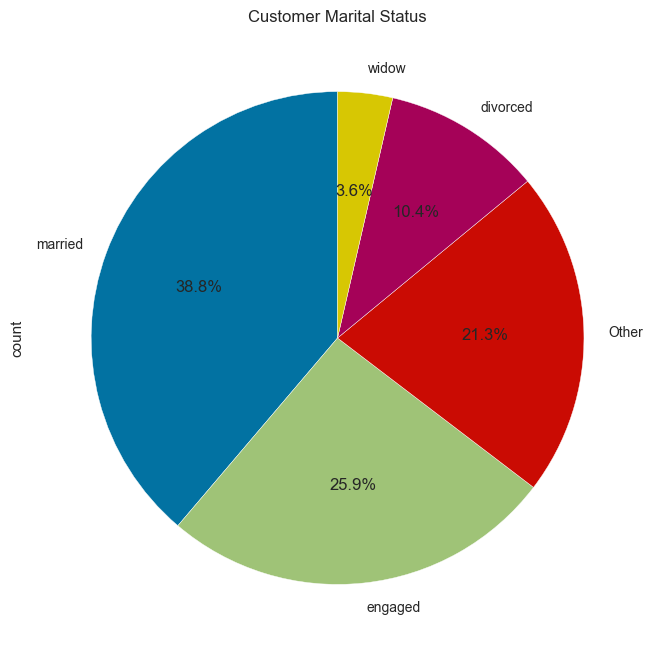

In [551]:
plt.figure(figsize=(8, 8))
customer_df['Marital_Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Customer Marital Status')
plt.show()

In [552]:
customer_df['Marital_Status']

0          Other
1          Other
2        engaged
3        engaged
4        married
          ...   
2235     married
2236     engaged
2237    divorced
2238     engaged
2239     married
Name: Marital_Status, Length: 2197, dtype: category
Categories (5, object): ['Other', 'divorced', 'engaged', 'married', 'widow']

## PreProcessing

In [553]:
# NumOfferAccepted kaldırıldı
customer_df = customer_df.drop("NumOfferAccepted1", axis=1, errors='ignore')


In [554]:
customer_df.head()

,Unnamed: 0,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,...,Complain,AcceptedCmp6,Age,Age_Group,NumberofDay,TotalSpentAmount,FamilySize,TotalAcceptedCmp,NumOfferAccepted2,IsParent
0,0,bachelor,Other,58138000.0,0,0,58,635000,88000,546000,...,0,1,67,Elderly,4153,982000,0,1,0,0
1,1,bachelor,Other,46344000.0,1,1,38,11000,1000,6000,...,0,0,70,Elderly,3603,16000,2,0,0,1
2,2,bachelor,engaged,71613000.0,0,0,26,426000,49000,127000,...,0,0,59,Senior,3802,350000,0,0,0,0
3,3,bachelor,engaged,26646000.0,1,0,26,11000,4000,20000,...,0,0,40,Adult,3629,42000,1,0,0,1
4,4,doctor's degree,married,58293000.0,1,0,94,173000,43000,118000,...,0,0,43,Middle Age,3651,249000,1,0,0,1


2) Observe Promotional campaigns

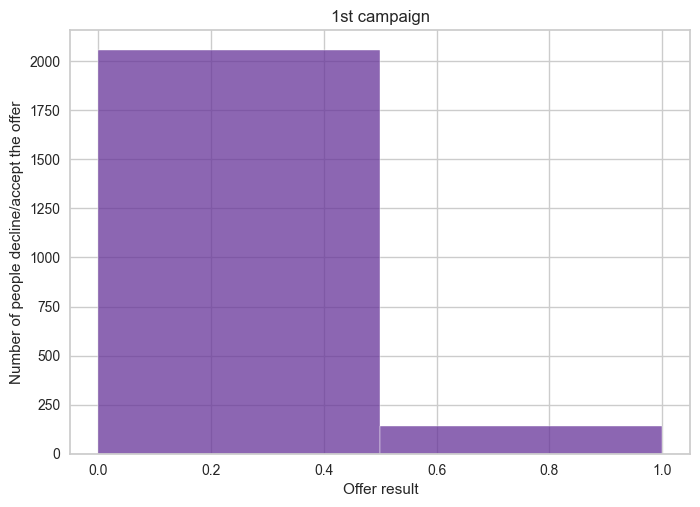

In [555]:
sns.histplot(customer_df['AcceptedCmp1'], bins=2, kde=False, color='rebeccapurple')
plt.xlabel("Offer result")
plt.ylabel("Number of people decline/accept the offer")
plt.title("1st campaign")
plt.show()

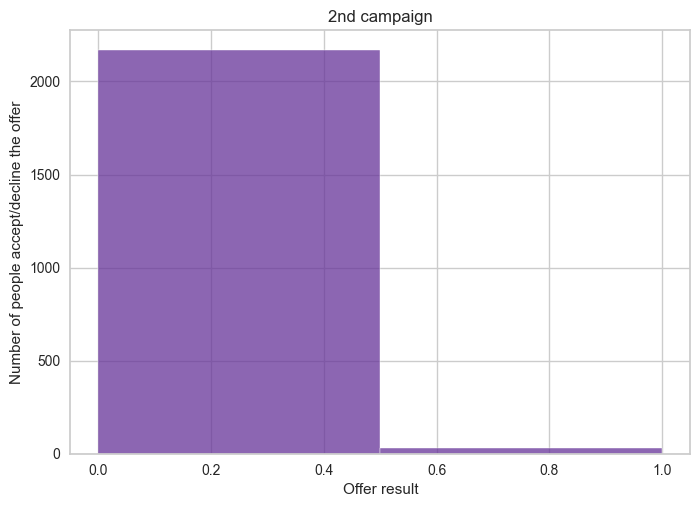

In [556]:
sns.histplot(customer_df['AcceptedCmp2'], bins=2, kde=False, color='rebeccapurple')
plt.xlabel("Offer result")
plt.ylabel("Number of people accept/decline the offer")
plt.title("2nd campaign")
plt.show()

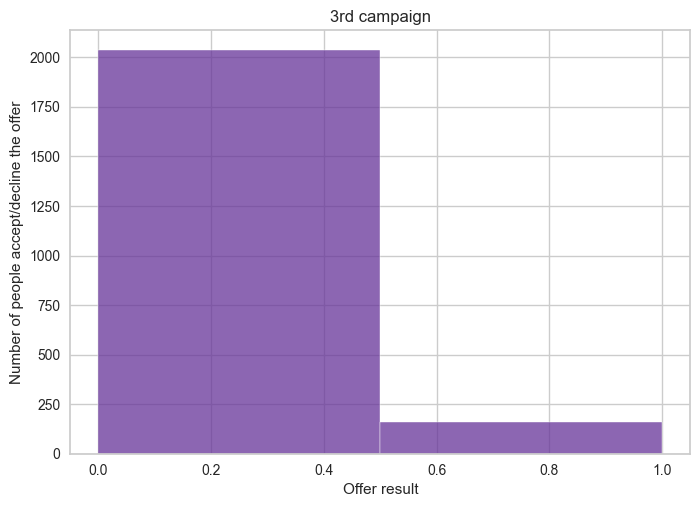

In [557]:
sns.histplot(customer_df['AcceptedCmp3'], bins=2, kde=False, color='rebeccapurple')
plt.xlabel("Offer result")
plt.ylabel("Number of people accept/decline the offer")
plt.title("3rd campaign")
plt.show()

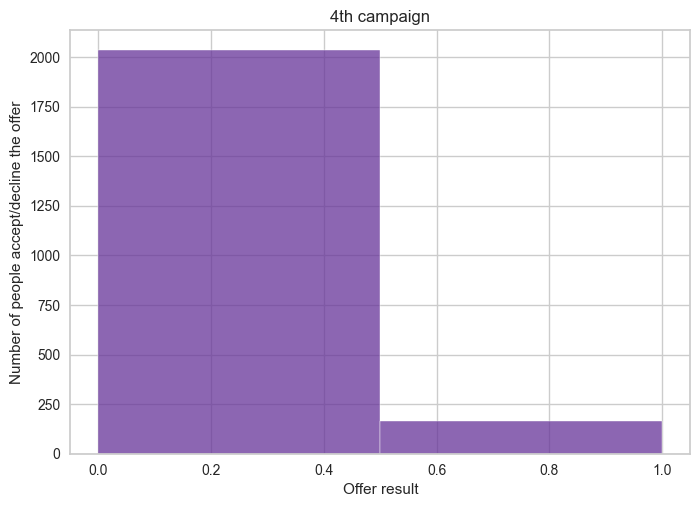

In [558]:
sns.histplot(customer_df['AcceptedCmp4'], bins=2, kde=False, color='rebeccapurple')
plt.xlabel("Offer result")
plt.ylabel("Number of people accept/decline the offer")
plt.title("4th campaign")
plt.show()

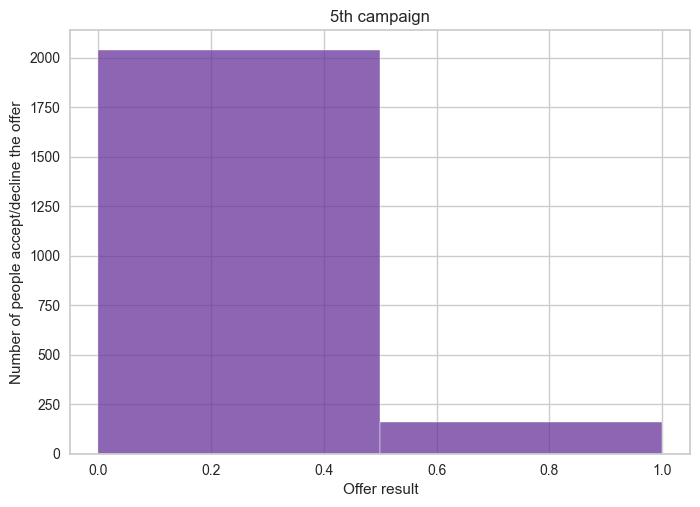

In [559]:
sns.histplot(customer_df['AcceptedCmp5'], bins=2, kde=False, color='rebeccapurple')
plt.xlabel("Offer result")
plt.ylabel("Number of people accept/decline the offer")
plt.title("5th campaign")
plt.show()

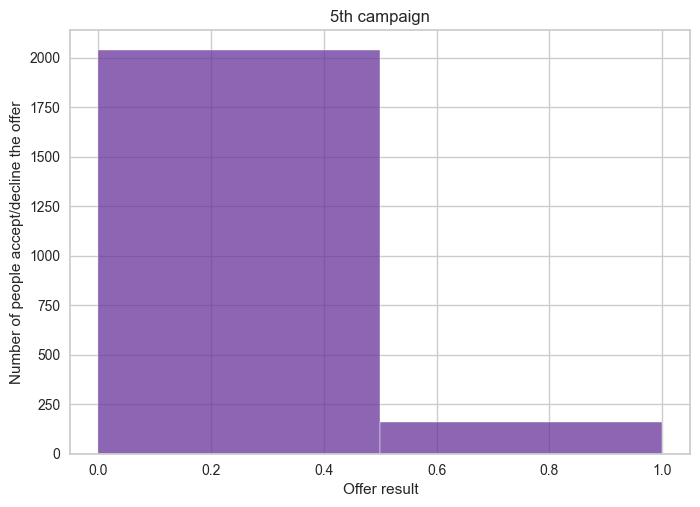

In [560]:
sns.histplot(customer_df['AcceptedCmp5'], bins=2, kde=False, color='rebeccapurple')
plt.xlabel("Offer result")
plt.ylabel("Number of people accept/decline the offer")
plt.title("5th campaign")
plt.show()

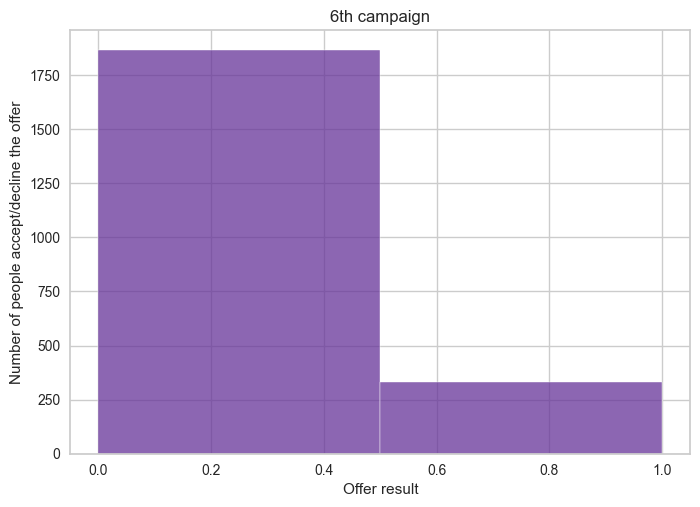

In [561]:
sns.histplot(customer_df['AcceptedCmp6'], bins=2, kde=False, color='rebeccapurple')
plt.xlabel("Offer result")
plt.ylabel("Number of people accept/decline the offer")
plt.title("6th campaign")
plt.show()

In [562]:
count_of_zeros = customer_df['AcceptedCmp1'].value_counts().get(0, 0)
count_of_ones = customer_df['AcceptedCmp1'].value_counts().get(1, 0)
total_count = len(customer_df)

print("Count of 0s ", count_of_zeros)
print("Count of 1s", count_of_ones)
print("Total count ", total_count)

Count of 0s  2055
Count of 1s 142
Total count  2197


In [563]:
count_of_zeros = customer_df['AcceptedCmp2'].value_counts().get(0, 0)
count_of_ones = customer_df['AcceptedCmp2'].value_counts().get(1, 0)
total_count = len(customer_df)

print("Count of 0s ", count_of_zeros)
print("Count of 1s", count_of_ones)
print("Total count ", total_count)

Count of 0s  2167
Count of 1s 30
Total count  2197


In [564]:
count_of_zeros = customer_df['AcceptedCmp3'].value_counts().get(0, 0)
count_of_ones = customer_df['AcceptedCmp3'].value_counts().get(1, 0)
total_count = len(customer_df)

print("Count of 0s ", count_of_zeros)
print("Count of 1s", count_of_ones)
print("Total count ", total_count)

Count of 0s  2035
Count of 1s 162
Total count  2197


In [565]:
count_of_zeros = customer_df['AcceptedCmp4'].value_counts().get(0, 0)
count_of_ones = customer_df['AcceptedCmp4'].value_counts().get(1, 0)
total_count = len(customer_df)

print("Count of 0s ", count_of_zeros)
print("Count of 1s", count_of_ones)
print("Total count ", total_count)

Count of 0s  2033
Count of 1s 164
Total count  2197


In [566]:
count_of_zeros = customer_df['AcceptedCmp5'].value_counts().get(0, 0)
count_of_ones = customer_df['AcceptedCmp5'].value_counts().get(1, 0)
total_count = len(customer_df)

print("Count of 0s ", count_of_zeros)
print("Count of 1s", count_of_ones)
print("Total count ", total_count)

Count of 0s  2036
Count of 1s 161
Total count  2197


In [567]:
count_of_zeros = customer_df['AcceptedCmp6'].value_counts().get(0, 0)
count_of_ones = customer_df['AcceptedCmp6'].value_counts().get(1, 0)
total_count = len(customer_df)

print("Count of 0s ", count_of_zeros)
print("Count of 1s", count_of_ones)
print("Total count ", total_count)

Count of 0s  1864
Count of 1s 333
Total count  2197


In [568]:
#Görüntülemek için:
campaign_column = ["1st campaign", "2nd campaign", "3rd campaign", "4th campaign", "5th campaign", "6th campaign"]
result_column = [142, 30, 163, 164, 162, 333]
percentage_column = ["142", "30", "162", "164", "162", "333"]

# Kampanyanın etkinliğini karşılaştırmak için bir bar grafiği oluşturulacak
# Grafik için df:
campaign_result_df = pd.DataFrame({
    'Campaign_column': campaign_column,
    'Result_column': result_column,
    'Percentage_column': percentage_column
})

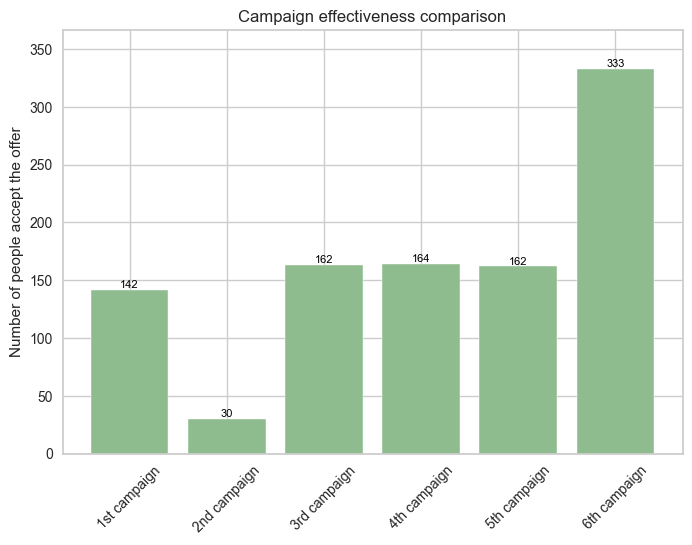

In [569]:
ylim = [0, 1.1 * max(campaign_result_df['Result_column'])]
barplot = plt.bar(campaign_result_df['Campaign_column'], campaign_result_df['Result_column'], color='darkseagreen')
plt.ylim(ylim)
plt.ylabel("Number of people accept the offer")
plt.title("Campaign effectiveness comparison")

for i, rect in enumerate(barplot):
    height = rect.get_height()
    percentage_label = campaign_result_df['Percentage_column'].iloc[i]
    plt.text(rect.get_x() + rect.get_width() / 2, height, percentage_label, ha='center', va='bottom', fontsize=8, color='black')
plt.xticks(rotation=45)
plt.show()

### Data Visualization

In [570]:
#Corelasyon matrisi için numeric değerlere ihtiyaç var
numericals = customer_df.select_dtypes(include=np.number)


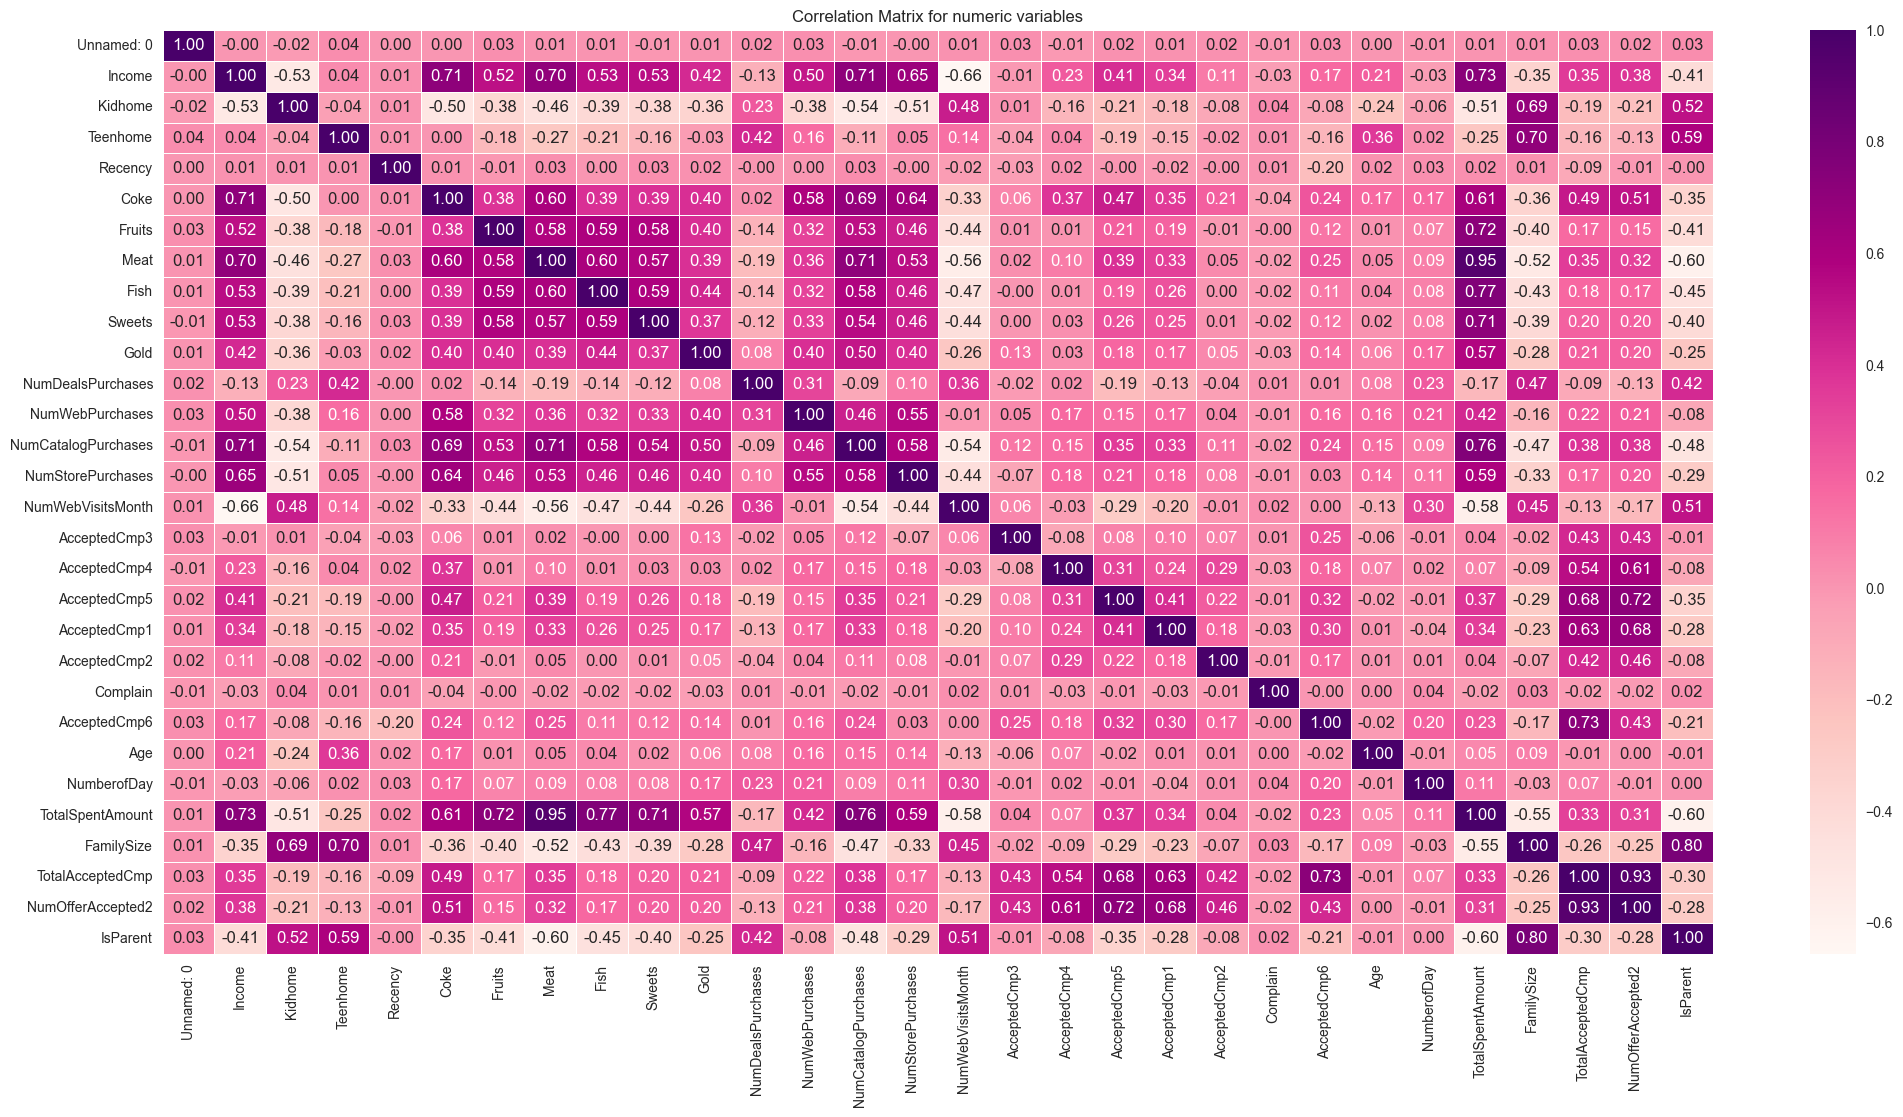

In [571]:
#Değişkenler analizi için bir correlation matrise ihtiyaç var
correlation_matrix = numericals.corr()
plt.figure(figsize=(25, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='RdPu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for numeric variables')
plt.show()

- Toplam harcama miktarı ile gelir arasında 0,73'lük güçlü bir pozitif korelasyon vardır.
- En çok harcanan ürün türünün 0,95 ile Et olduğu görülüyor.
- Katalog Satın Alma, mağaza içi, web ve fırsat satın alımlarından daha iyi bir korelasyona sahiptir.
- Son kampanyaya müşteri ilgisi diğer kampanyalara göre daha iyi. 0,73 güçlü pozitif korelasyon.


In [572]:
# Daha sonra kullanmak için oluşturuldu
categoricals = customer_df.select_dtypes(include='object')

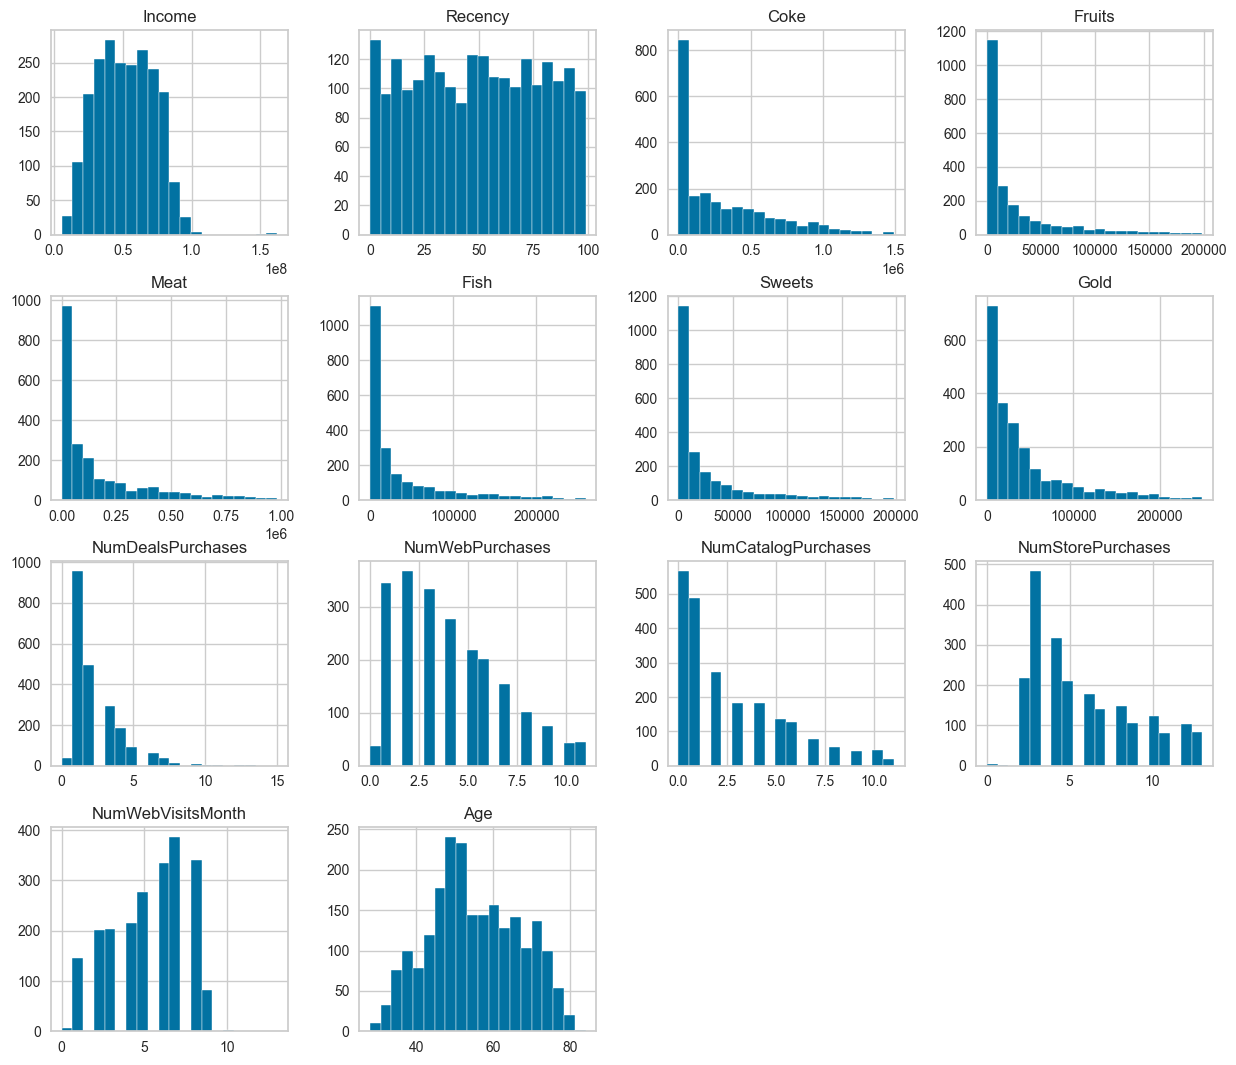

In [573]:
#İlgili birkaç değer dağılımını analiz etmek için görselleştirildi
selected_columns = ['Income', 'Recency', 'Coke', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold',
                     'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                     'NumWebVisitsMonth', 'Age']

customer_df[selected_columns].hist(figsize=(15, 13), bins=20)
plt.show()

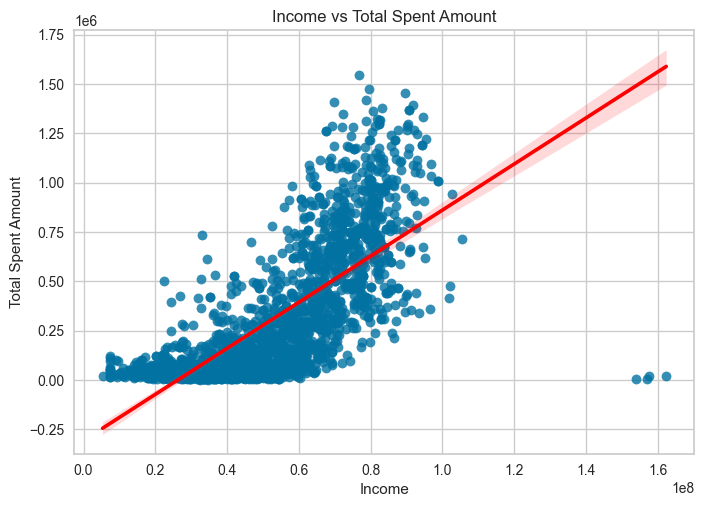

In [574]:
#Income vs Toplam Harcama Miktarı
sns.regplot(x='Income', y='TotalSpentAmount', data=customer_df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Income vs Total Spent Amount')
plt.xlabel('Income')
plt.ylabel('Total Spent Amount')
plt.show()

Gelir ve toplam harcama tutarı arasında pozitif bir ilişki olduğu görülüyor. Yüksek gelirli olan müşterilerin toplam harcama tutarının da fazla olduğu görülüyor. 

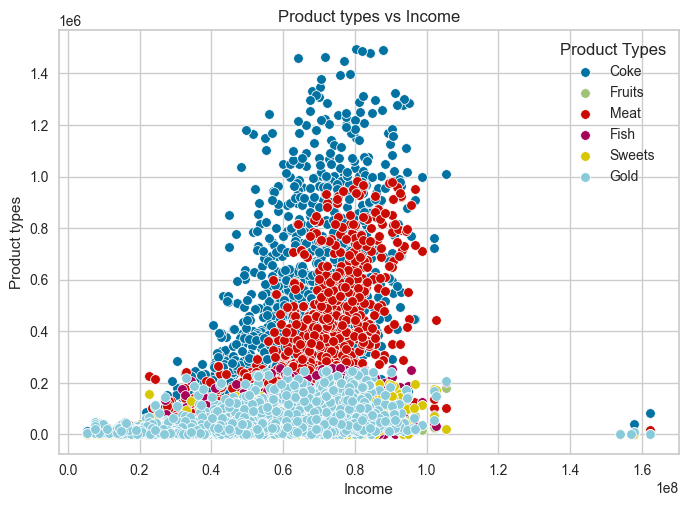

In [575]:
#Compare Income vs Total Spent Amount
for column in ['Coke', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']:
    sns.scatterplot(x='Income', y=column, data=customer_df, label=column)

plt.title('Product types vs Income')
plt.xlabel('Income')
plt.ylabel('Product types')
plt.legend(title='Product Types')
plt.show()

Ürün türüne göre satış miktarları görselleştirildi. Geliri yüksek olanlar en fazla kola almıştır. Et onu takip etmektedir. En az ise altın alışverişi yapılmıştır.

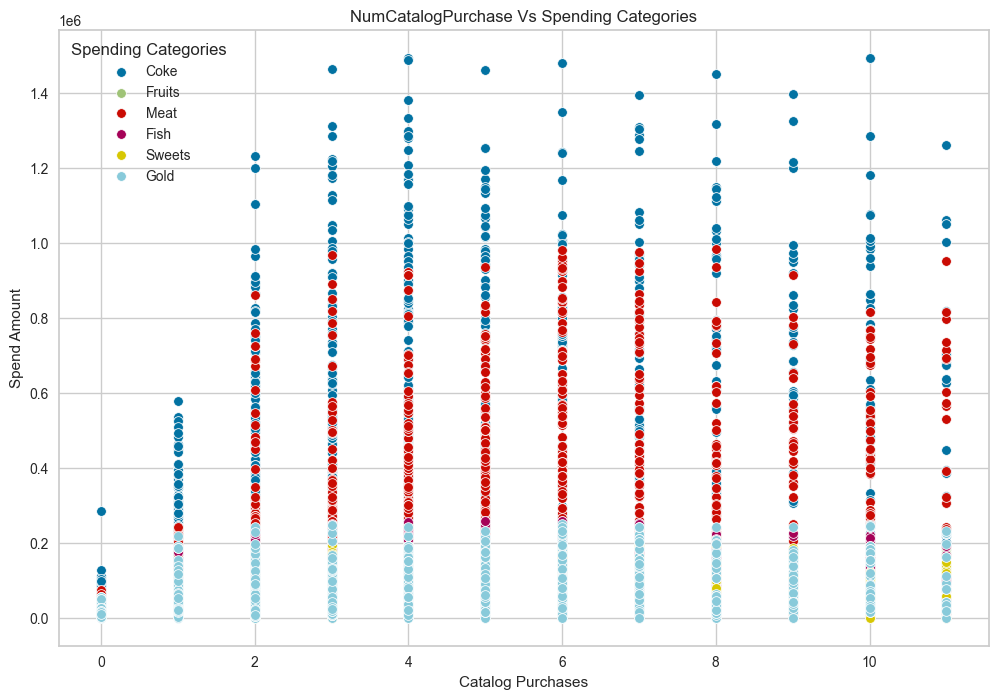

In [576]:
plt.figure(figsize=(12, 8))

for column in ['Coke', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']:
    sns.scatterplot(x='NumCatalogPurchases', y=column, data=customer_df, label=column)

plt.title('NumCatalogPurchase Vs Spending Categories')
plt.xlabel('Catalog Purchases')
plt.ylabel('Spend Amount')
plt.legend(title='Spending Categories')
plt.show()

Gold alımı düşük olduğu gözleniyor. Meat ve Coke fazla satın alındığı gözleniyor.

In [577]:
customer_df.head()

,Unnamed: 0,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,...,Complain,AcceptedCmp6,Age,Age_Group,NumberofDay,TotalSpentAmount,FamilySize,TotalAcceptedCmp,NumOfferAccepted2,IsParent
0,0,bachelor,Other,58138000.0,0,0,58,635000,88000,546000,...,0,1,67,Elderly,4153,982000,0,1,0,0
1,1,bachelor,Other,46344000.0,1,1,38,11000,1000,6000,...,0,0,70,Elderly,3603,16000,2,0,0,1
2,2,bachelor,engaged,71613000.0,0,0,26,426000,49000,127000,...,0,0,59,Senior,3802,350000,0,0,0,0
3,3,bachelor,engaged,26646000.0,1,0,26,11000,4000,20000,...,0,0,40,Adult,3629,42000,1,0,0,1
4,4,doctor's degree,married,58293000.0,1,0,94,173000,43000,118000,...,0,0,43,Middle Age,3651,249000,1,0,0,1


## Modeling

- Logistic Regression
 - Simple Logistic
 - Full Logistic

### Logistic Regression

 Simple Logistic

In [578]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import statsmodels.api as sm

 statsmodels: kütüphanesi, Python'da istatistiksel modeller oluşturmak, test etmek ve sonuçları incelemek için kullanılan bir kütüphanedir. Bu kütüphane, çeşitli regresyon modelleri, zaman serisi analizi, doğrusal modeller, karışık etkiler ve diğer istatistiksel yöntemleri içerir.

Son kampanya olan AcceptedCmp6, diğer ilk beş kampanyaya bağlı olarak tahmin etmeye çalışılıyor.
Bağımlı Dğeişken: AcceptedCmp6
Bağımsız değişken: NumOfferAccepted2

In [579]:
np.random.seed(1)
#Veri seti train ve validation data olarak ikiye ayrıldı.
train_rows = np.random.choice(customer_df.index, size=int(len(customer_df) * 0.7), replace=False)
train_data = customer_df.loc[train_rows]
valid_data = customer_df.drop(train_rows)

# Lojistik regresyon modelini oluştur
# istatistiksel modellerin tahmin edilmesi için kullanılan 'statsmodels' kullandım
X_train = sm.add_constant(train_data['NumOfferAccepted2'])
y_train = train_data['AcceptedCmp6']

logit_simple = sm.Logit(y_train, X_train)
result = logit_simple.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.359224
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp6   No. Observations:                 1537
Model:                          Logit   Df Residuals:                     1535
Method:                           MLE   Df Model:                            1
Date:                Wed, 24 Jan 2024   Pseudo R-squ.:                  0.1666
Time:                        00:04:04   Log-Likelihood:                -552.13
converged:                       True   LL-Null:                       -662.49
Covariance Type:            nonrobust   LLR p-value:                 6.307e-50
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.3324      0.096    -24.254      0.000      -2.521      -2.144
NumOffer

- NumOfferAccepted2 değişkeni ile AcceptedCmp6 değişkeni arasındaki ilişkiyi değerlendiren bir lojistik regresyon modeli oluşturdum. NumOfferAccepted2 değişkenindeki bir birimlik artışın, AcceptedCmp6 değişkenindeki olumlu yanıt olasılığını 1.3804 birim artırdığını söyleyebiliriz.
-  Bu değerler ve istatistiksel test sonuçları, modelin istatistiksel olarak anlamlı bir şekilde değişkenleri tahmin ettiğini gösteriyor.
- Pseudo R-kare değeri, modelin bağımlı değişkeni açıklama yeteneğini temsil eder. Bu değer ne kadar yüksekse, modelin açıklama gücü o kadar iyidir.

In [580]:
#Confusion Matrix oluşturmak için gerekli import işlemi yapıldı
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

In [581]:
X_valid = sm.add_constant(valid_data['NumOfferAccepted2'])
y_valid = valid_data['AcceptedCmp6']

# Logit modelinden tahminleri alma işlemi yapıldı
pred_prob = result.predict(X_valid)
threshold = 0.5
pred_binary = (pred_prob >= threshold).astype(int)

conf_matrix = confusion_matrix(y_valid, pred_binary)

conf_matrix_df = pd.DataFrame(conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

print("Confusion Matrix:")
conf_matrix_df

Confusion Matrix:


,Predicted 0,Predicted 1
Actual 0,551,14
Actual 1,70,25


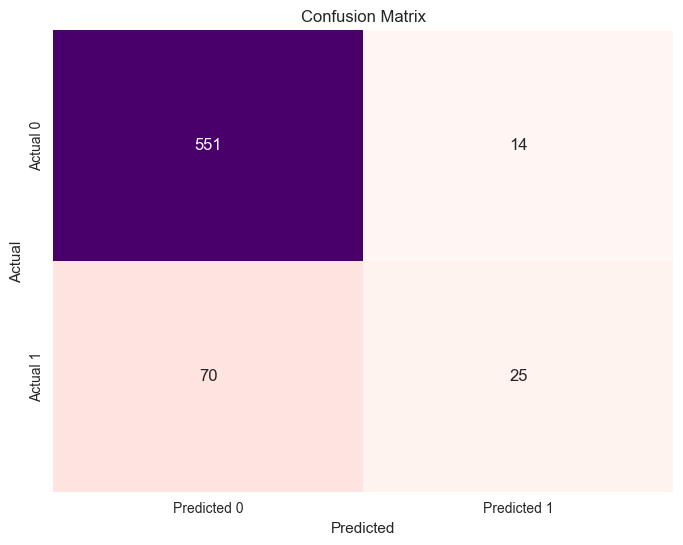

In [582]:
# Confusion matrix heatmap'i
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='RdPu', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- True Positive (TP): Modelin doğru bir şekilde pozitif sınıfı tahmin ettiği durum sayısı.
- True Negative (TN): Modelin doğru bir şekilde negatif sınıfı tahmin ettiği durum sayısı.
- False Positive (FP): Modelin negatif bir örneği pozitif olarak yanlış tahmin ettiği durum sayısı.
- False Negative (FN): Modelin pozitif bir örneği negatif olarak yanlış tahmin ettiği durum sayısı.

- Precision (Precision veya Positive Predictive Value): TP / (TP + FP)
- Recall (Sensitivity veya True Positive Rate): TP / (TP + FN)
- Accuracy: (TP + TN) / (TP + TN + FP + FN)
- F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

In [583]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [584]:

# Accuracy için:
accuracy = accuracy_score(y_valid, pred_binary)
print(f"Accuracy: {accuracy:.4f}")

# Precision için:
precision = precision_score(y_valid, pred_binary)
print(f"Precision: {precision:.4f}")

# Recall için:
recall = recall_score(y_valid, pred_binary)
print(f"Recall: {recall:.4f}")

# F1 Score için:
f1 = f1_score(y_valid, pred_binary)
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8727
Precision: 0.6410
Recall: 0.2632
F1 Score: 0.3731


- Precision: 0.6410 Modelin "1" olarak tahmin ettiği müşterilerin %64.1'i gerçekten kampanyayı kabul etmiştir.
- Recall: 0.2632 Kampanyayı kabul eden müşterilerin %26.3'ü model tarafından doğru bir şekilde tespit edilmiştir.
- Accuracy: 0.8727 Modelin toplam tahminlerinin %86.6'sı doğrudur
- F1 Score: 0.3731 Modelin hem precision hem de recall açısından iyi bir performans gösterip göstermediğini değerlendirmek için kullanılır. Bu durumda, %38.7 F1 Score elde edilmiştir.

Bu değerlere bakılarak model performansının düşük olduğunu gözlemleyebiliriz.

Full Logistic

In [585]:
from sklearn.model_selection import train_test_split

Amaç: Son kampanya olan AcceptedCmp6, diğer sütunlara göre tahmin ediliyor
Bağımlı Dğeişken: AcceptedCmp6
Bağımsız değişken: Tüm sütunlar

In [586]:
numeric_columns = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'Coke', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'AcceptedCmp6', 'Age', 'TotalSpentAmount', 'FamilySize']
df_numeric = customer_df[numeric_columns]

train_data, valid_data = train_test_split(df_numeric, test_size=0.3, random_state=1)

X_train = sm.add_constant(train_data.drop('AcceptedCmp6', axis=1))  
y_train = train_data['AcceptedCmp6']
logit_simple = sm.Logit(y_train, X_train)
result = logit_simple.fit()

print(result.summary())

         Current function value: 0.268642
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp6   No. Observations:                 1537
Model:                          Logit   Df Residuals:                     1513
Method:                           MLE   Df Model:                           23
Date:                Wed, 24 Jan 2024   Pseudo R-squ.:                  0.3531
Time:                        00:04:05   Log-Likelihood:                -412.90
converged:                      False   LL-Null:                       -638.23
Covariance Type:            nonrobust   LLR p-value:                 6.172e-81
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -4.5028      0.854     -5.272      0.000      -6.177      -2.829
Income               1.817e-08   1.06e

c:\Users\sevgi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [587]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [588]:
# Validasyon veri seti üzerinde tahmin yapıldı
X_valid = sm.add_constant(valid_data.drop('AcceptedCmp6', axis=1))
y_valid_true = valid_data['AcceptedCmp6']
y_valid_pred = result.predict(X_valid)

# Tahminleri ikili (0/1) sınıflara dönüştürüldü
y_valid_pred_binary = (y_valid_pred >= 0.5).astype(int)

cm = confusion_matrix(y_valid_true, y_valid_pred_binary)

print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[534  17]
 [ 69  40]]


In [589]:
# Metrikler yazdırıldı
accuracy = accuracy_score(y_valid_true, y_valid_pred_binary)
precision = precision_score(y_valid_true, y_valid_pred_binary)
recall = recall_score(y_valid_true, y_valid_pred_binary)
f1 = f1_score(y_valid_true, y_valid_pred_binary)

print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.87
Precision: 0.70
Recall: 0.37
F1 Score: 0.48


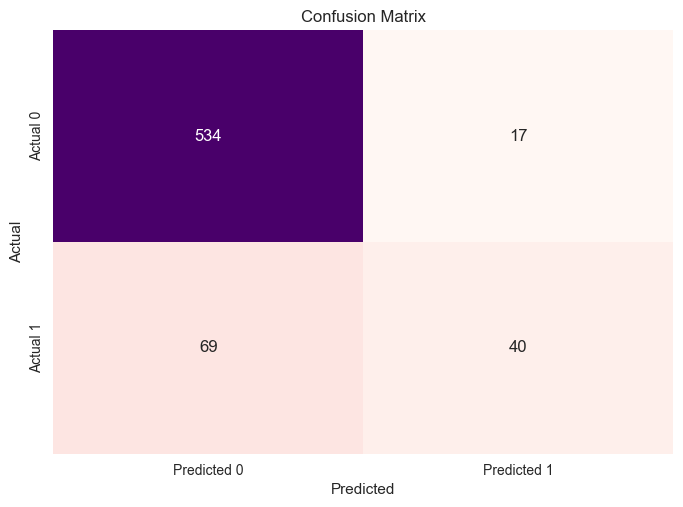

In [590]:
cm = confusion_matrix(y_valid_true, y_valid_pred_binary)

# matris çizildi
sns.heatmap(cm, annot=True, fmt='g', cmap='RdPu', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

- Precision: 0.70 pozitif olarak tahmin edilen örneklerin yüzde 70'i gerçekten pozitif. İyi bir değer, ancak probleme bağlı olarak iyileştirilebilir.
- Recall:  0.37, gerçekten pozitif olan örneklerin yüzde 37'si doğru bir şekilde pozitif olarak tahmin edilmiş. Önceki modele göre daha başarılı ama daha yüksek olabilirdi.
- Accuracy: 0.87 Modelin doğru tahmin ettiği oran oldukça yüksek.
- F1 Score: 0.48, precision ve recall'in bir kombinasyonu olarak dengelidir. Daha yüksek olabilirdi.

## Clustering Data

### KMeans for n_clusters=3

- Müşteri segmentasyonu, pazar segmentasyonu süreçlerinde sıklıkla K-Means uygulanır. 
- Hata parametresinin değerini minimum yapmak için büyük kümeleri bölerek mümkün olduğunca birbirinden ayrık kümeler elde etmeyle çalışır

In [591]:
customer_df.columns

Index(['Unnamed: 0', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'Coke', 'Fruits', 'Meat', 'Fish', 'Sweets',
       'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'AcceptedCmp6', 'Age', 'Age_Group', 'NumberofDay',
       'TotalSpentAmount', 'FamilySize', 'TotalAcceptedCmp',
       'NumOfferAccepted2', 'IsParent'],
      dtype='object')

In [592]:
new_customer_df=customer_df[['Income','Age','Kidhome','FamilySize','Recency','Coke','Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'TotalSpentAmount','NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth','IsParent']]

In [593]:
new_customer_df.head()

,Income,Age,Kidhome,FamilySize,Recency,Coke,Fruits,Meat,Fish,Sweets,Gold,TotalSpentAmount,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,IsParent
0,58138000.0,67,0,0,58,635000,88000,546000,172000,88000,88000,982000,3,8,10,4,7,0
1,46344000.0,70,1,2,38,11000,1000,6000,2000,1000,6000,16000,2,1,1,2,5,1
2,71613000.0,59,0,0,26,426000,49000,127000,111000,21000,42000,350000,1,8,2,10,4,0
3,26646000.0,40,1,1,26,11000,4000,20000,10000,3000,5000,42000,2,2,0,4,6,1
4,58293000.0,43,1,1,94,173000,43000,118000,46000,27000,15000,249000,5,5,3,6,5,1


In [594]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [595]:
# Scale data
scaler = StandardScaler()
scaled_customers = scaler.fit_transform(new_customer_df)
scaled_customers = pd.DataFrame(scaled_customers, 
                                columns=new_customer_df.columns)

- Silhouette_score bu tarz kümeleme algoritmalarında kullanılır.
- -1 ile 1 arasında değişir.
- Yüksek bir değer nesnenin kendi kümesi ile iyi eşleştiğini gösterir.

In [596]:
cluster_nums = [2,3,4,5,6,7] # Farklı küme sayılarını içeren liste oluşturuldu (denenmesi için)
scores = []
sum_of_squared_distances = [] #Her farklı küme sayısı için silhouette skorlarını tutacak

for cluster_num in cluster_nums: # Her küme sayısı için işlemler gerçekleştirilecek
    kmeans = KMeans(cluster_num, random_state=0) # Küme sayısı ile kmeans modeli oluşturuldu
    kmeans.fit(scaled_customers) # Küme medeli müşteri verilerine uygulandı
    sum_of_squared_distances.append(kmeans.inertia_) # toplam kare mesafesi tutar
    #sum_of_squared_distances listesine ekler. Bu değer, veri noktalarının küme merkezlerine olan toplam uzaklığını ölçer ve kümeleme performansını yansıtan bir metriktir.
    clusters = kmeans.predict(scaled_customers) #her bir veri noktasını hangi kümeye atandığını belirlendi
    silhouette = silhouette_score(scaled_customers, clusters)  #SİLHOUTTE SKORU HESAPLAR
    scores.append(silhouette)

c:\Users\sevgi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sevgi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sevgi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sevgi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

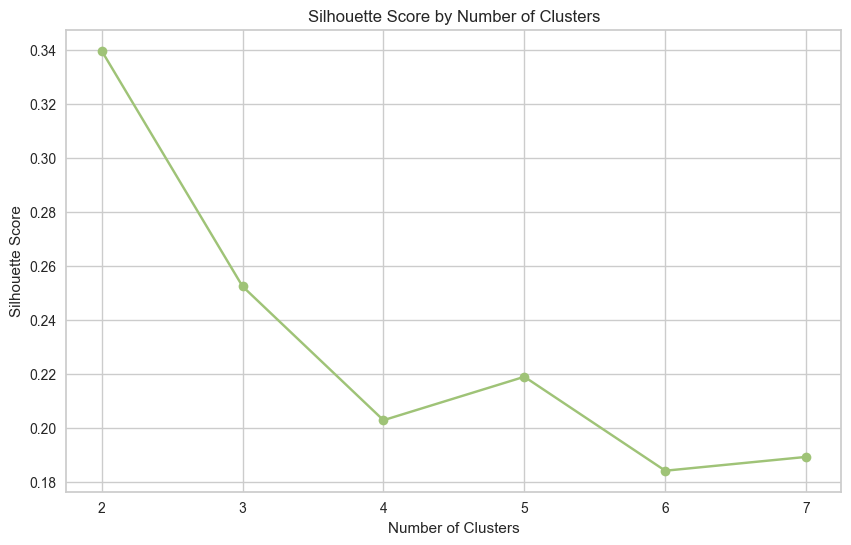

In [597]:
# Silhouette score
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(cluster_nums, scores, marker='o', linestyle='-', color='g')
plt.title('Silhouette Score by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [598]:
#Görselleştirme için yapılması gereken import
from yellowbrick.cluster import SilhouetteVisualizer

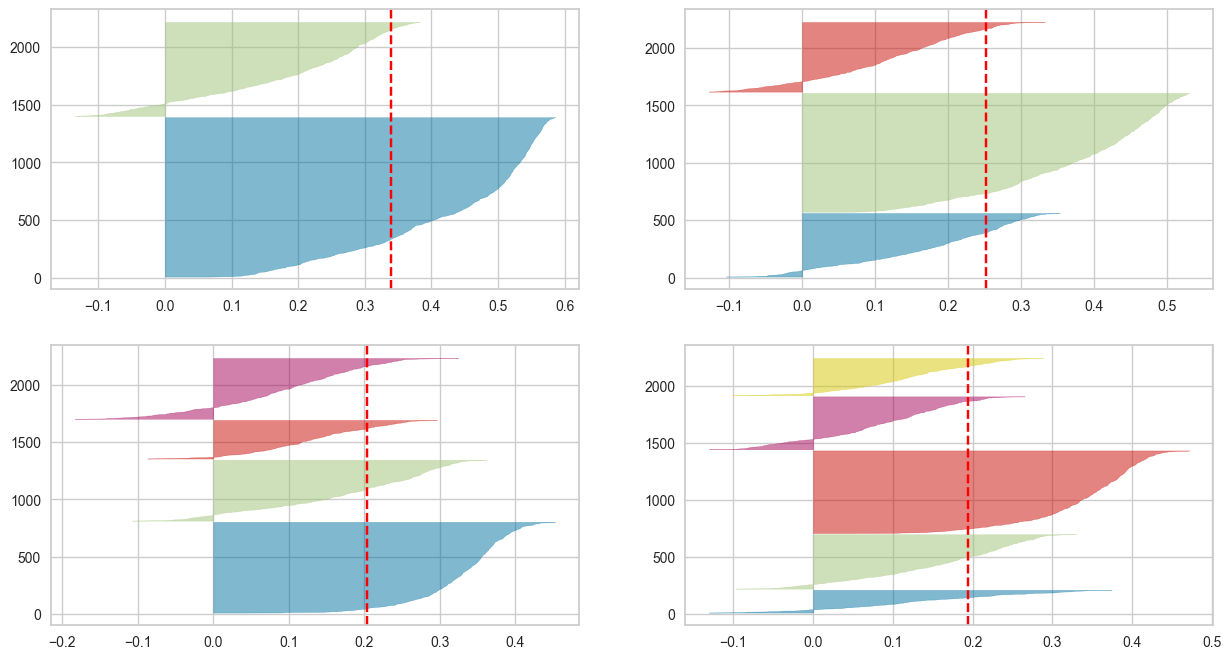

In [599]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
   
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_customers)

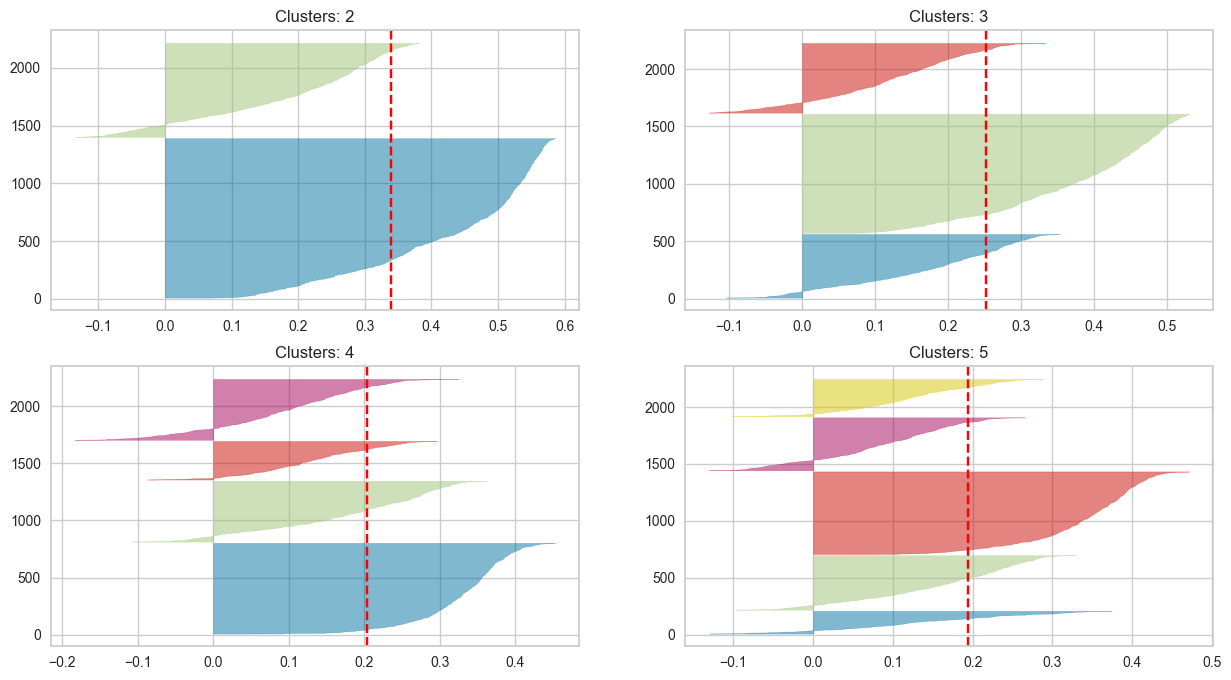

In [600]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

for i in [2, 3, 4, 5]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_customers)
    
    # Küme sayısını grafik üzerine yazdırılarak çizildi
    ax[q-1][mod].set_title(f'Clusters: {i}')


- Siluet grafiği, bir kümedeki her bir noktanın komşu kümelerdeki noktalara ne kadar yakın olduğunun bir ölçüsünü gösterir 

In [601]:
# 3 grup için:
kmeans_groups_3 = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans_groups_3.fit(scaled_customers)

KMeans(n_clusters=3, n_init=10, random_state=0)

<Axes: title={'center': 'Three clusters analysis'}>

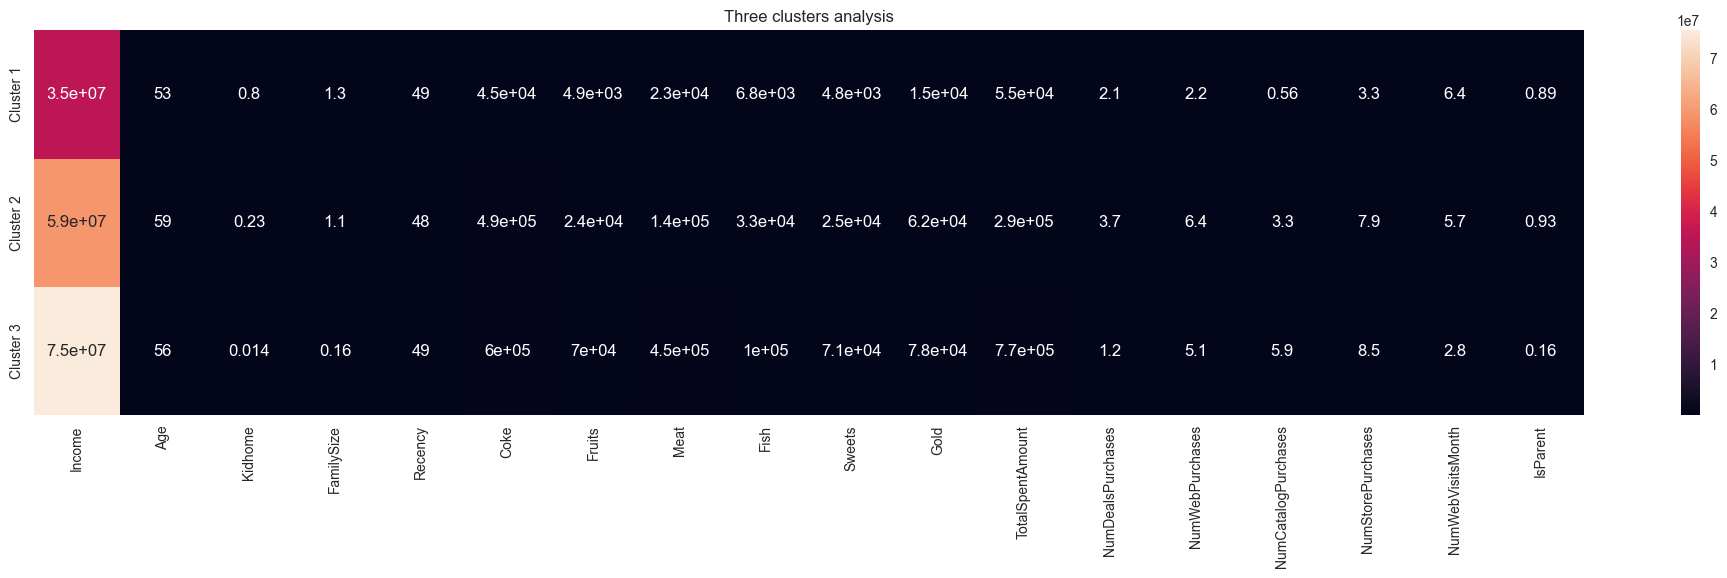

In [602]:
plt.figure(figsize=(25,5))
plt.title('Three clusters analysis')
sns.heatmap(scaler.inverse_transform(kmeans_groups_3.cluster_centers_),
            annot=True,
            yticklabels=['Cluster 1','Cluster 2', 'Cluster 3'],
            xticklabels=scaled_customers.columns)

## Analiz Sonuçları

Cluster 3:
- Tüm kümelerin en yüksek gelir değeri
- Çocuk Sayısı Az
- Tüm ürün türlerini en çok satın alan küme
- Anlaşmalı satışları en az olan küme
- Ebeveyn olanların en az olduğu küme
- Katolog Satışları en fazla olan küme
- Mağaza satışları en fazla olan küme
- Aylık web site ziyaretleri en az olan küme

Cluster 2:
- Müşteri yaşı en büyük olan
- Recency değeri en düşük olan küme
- Fruits, Meat, Sweets türü satışları en az olan küme
- Anlaşmalı ve web sitesi satışı en fazla olan küme
- Ebeveyn olanların en fazla olduğu küme

Cluster 1:
- Evinde çocuk olan müşterilerin en fazla olduğu küme
- Aile Büyüklüğü en fazla olan küme
- Coke ve Gold alanların en az olduğu küme
- Web, katolog ve mağaza alışverişlerinin en az olduğu küme
- Aylık web ziyaretçi sayılarının en fazla olduğu 

Cluster 3 Insights:
- Odak nokta bu küme olmalı. Çünü neredeyse her ürün türünün satışı fazla.
- Geliri yüksek olanlar bu kümede.
- Katolog ve mağaza satışlarına odaklanılmalı. Çünkü en fazla harcanmalar burada.
- Web'den satın alma fazla ama web sitesi ziyareti az.

Cluster 2 Insights:
- Bu müşteri herhangi bir oda noktası olmamalı.
- Satın alışlar düşük. Web sitesi ziyaret ediyorlar ama ürün satın almıyorlar.

Cluster 1 Insights:
- Diğer kümelere oranla evinde çocukların fazla olduğu müşterilerin yoğun olduğu küme.
- Fazla ürün satın alınıyor. Web sitesi fazla ziyaret ediliyor.
- İkinci odak nokta bu küme olmalı. Ortalama gelire sahip olan müşterilerdir. Orta veya düşük maliyetli ürünleri satın alma olasıklıkları fazladır. 

### KMeans for n_clusters=4

In [603]:
cluster_b=customer_df.copy()

In [604]:
cluster_b.head()

,Unnamed: 0,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Coke,Fruits,Meat,...,Complain,AcceptedCmp6,Age,Age_Group,NumberofDay,TotalSpentAmount,FamilySize,TotalAcceptedCmp,NumOfferAccepted2,IsParent
0,0,bachelor,Other,58138000.0,0,0,58,635000,88000,546000,...,0,1,67,Elderly,4153,982000,0,1,0,0
1,1,bachelor,Other,46344000.0,1,1,38,11000,1000,6000,...,0,0,70,Elderly,3603,16000,2,0,0,1
2,2,bachelor,engaged,71613000.0,0,0,26,426000,49000,127000,...,0,0,59,Senior,3802,350000,0,0,0,0
3,3,bachelor,engaged,26646000.0,1,0,26,11000,4000,20000,...,0,0,40,Adult,3629,42000,1,0,0,1
4,4,doctor's degree,married,58293000.0,1,0,94,173000,43000,118000,...,0,0,43,Middle Age,3651,249000,1,0,0,1


In [605]:
from sklearn.preprocessing import LabelEncoder

In [606]:
encoder = LabelEncoder()

for col in cluster_b.columns:
    if cluster_b[col].dtype == 'object':
        print('\n')
        print('Columns Name: %s' %col)
        print('---------------')
        cluster_b[col] = cluster_b[[col]].apply(encoder.fit_transform)
        for i in range(len(encoder.classes_)):
            print(encoder.classes_[i],':', i)



Columns Name: Age_Group
---------------
Adult : 0
Elderly : 1
Middle Age : 2
Senior : 3
Young Adult : 4


In [607]:
encoder = LabelEncoder()

for col in cluster_b.columns:
    if cluster_b[col].dtype == 'category':
        print('\n')
        print('Columns Name: %s' %col)
        print('---------------')
        cluster_b[col] = cluster_b[[col]].apply(encoder.fit_transform)
        for i in range(len(encoder.classes_)):
            print(encoder.classes_[i],':', i)



Columns Name: Education
---------------
High School : 0
bachelor : 1
doctor's degree : 2
junior technical college : 3
master degree : 4


Columns Name: Marital_Status
---------------
Other : 0
divorced : 1
engaged : 2
married : 3
widow : 4


In [608]:
selected_columns = ['Age', 'Income','TotalSpentAmount','NumberofDay','Coke','Fruits','Meat','Fish','Sweets','Gold','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','AcceptedCmp6','Complain','Kidhome','Age_Group','Education', 'Marital_Status']
new_df = cluster_b[selected_columns]

new_df

,Age,Income,TotalSpentAmount,NumberofDay,Coke,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Complain,Kidhome,Age_Group,Education,Marital_Status
0,67,58138000.0,982000,4153,635000,88000,546000,172000,88000,88000,...,0,0,0,0,1,0,0,1,1,0
1,70,46344000.0,16000,3603,11000,1000,6000,2000,1000,6000,...,0,0,0,0,0,0,1,1,1,0
2,59,71613000.0,350000,3802,426000,49000,127000,111000,21000,42000,...,0,0,0,0,0,0,0,3,1,2
3,40,26646000.0,42000,3629,11000,4000,20000,10000,3000,5000,...,0,0,0,0,0,0,1,0,1,2
4,43,58293000.0,249000,3651,173000,43000,118000,46000,27000,15000,...,0,0,0,0,0,0,1,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,57,61223000.0,632000,3871,709000,43000,182000,42000,118000,247000,...,0,0,0,0,0,0,0,3,1,3
2236,78,64014000.0,38000,3509,406000,0,30000,0,0,8000,...,0,0,1,0,0,0,2,1,2,2
2237,43,56981000.0,333000,3645,908000,48000,217000,32000,12000,24000,...,1,0,0,0,0,0,0,2,1,1
2238,68,69245000.0,415000,3646,428000,30000,214000,80000,30000,61000,...,0,0,0,0,0,0,0,1,4,2


In [609]:
#Scale işlemi yapıldı
cols = ['Age' ,'Income',
         'Coke', 'Fruits', 'Meat',
        'Fish', 'Sweets', 'Gold','NumberofDay','TotalSpentAmount']

X = new_df.copy()

Scaler = StandardScaler()
for col in cols:
    X[col] = Scaler.fit_transform(X[[col]])

X.head(5)

,Age,Income,TotalSpentAmount,NumberofDay,Coke,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Complain,Kidhome,Age_Group,Education,Marital_Status
0,1.018181,0.292274,2.047435,1.527951,0.971035,1.544723,1.768352,2.444219,1.490252,0.867118,...,0,0,0,0,1,0,0,1,1,0
1,1.274662,-0.271193,-0.854038,-1.193206,-0.877203,-0.639808,-0.738414,-0.653993,-0.638573,-0.741900,...,0,0,0,0,0,0,1,1,1,0
2,0.334231,0.936053,0.149163,-0.208642,0.351994,0.565451,-0.176713,1.332508,-0.149188,-0.035502,...,0,0,0,0,0,0,0,3,1,2
3,-1.290150,-1.212280,-0.775945,-1.064569,-0.877203,-0.564479,-0.673423,-0.508195,-0.589634,-0.761523,...,0,0,0,0,0,0,1,0,1,2
4,-1.033669,0.299680,-0.154200,-0.955723,-0.397372,0.414793,-0.218492,0.147897,-0.002372,-0.565301,...,0,0,0,0,0,0,1,2,2,3


In [610]:
new_df.head()

,Age,Income,TotalSpentAmount,NumberofDay,Coke,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,AcceptedCmp6,Complain,Kidhome,Age_Group,Education,Marital_Status
0,67,58138000.0,982000,4153,635000,88000,546000,172000,88000,88000,...,0,0,0,0,1,0,0,1,1,0
1,70,46344000.0,16000,3603,11000,1000,6000,2000,1000,6000,...,0,0,0,0,0,0,1,1,1,0
2,59,71613000.0,350000,3802,426000,49000,127000,111000,21000,42000,...,0,0,0,0,0,0,0,3,1,2
3,40,26646000.0,42000,3629,11000,4000,20000,10000,3000,5000,...,0,0,0,0,0,0,1,0,1,2
4,43,58293000.0,249000,3651,173000,43000,118000,46000,27000,15000,...,0,0,0,0,0,0,1,2,2,3


c:\Users\sevgi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sevgi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sevgi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\sevgi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

Text(0, 0.5, 'Inertia')

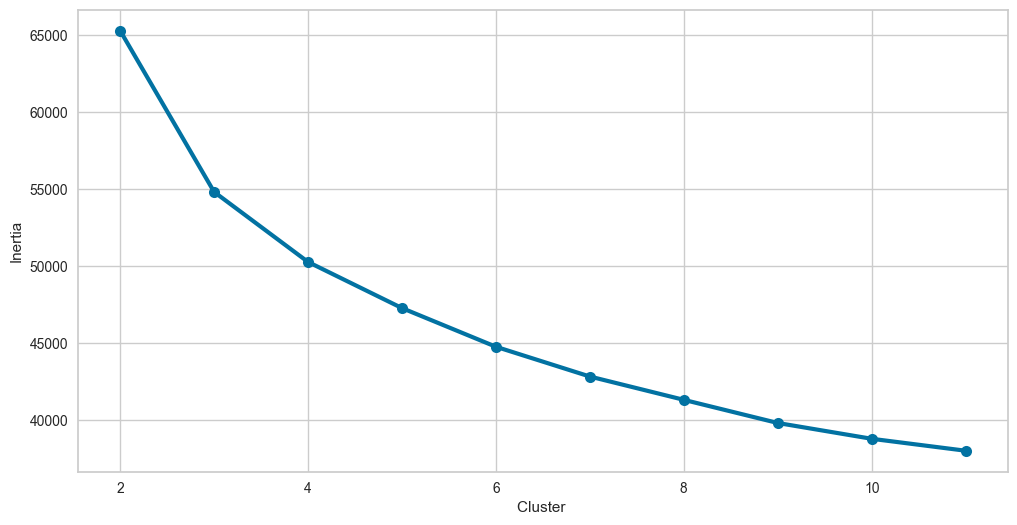

In [611]:
kmeans_per_cluster = []
for i in range(2, 12):
    temp =KMeans(n_clusters = i, random_state = 0).fit(X)
    kmeans_per_cluster.append(temp)
    
inertia = [model.inertia_ for model in kmeans_per_cluster]

plt.figure(figsize = (12, 6))
plt.plot(range(2, 12), inertia, 'o-', ms = 8, linewidth=3) 
plt.xlabel('Cluster ')
plt.ylabel('Inertia')


Silhouette Score hesaplaması burada da yapıldı. Aslında en iyi skor 2 ama 4'ün skoru da iyi. 

In [612]:
# 4 küme için:
kmeans = KMeans(n_clusters = 4, random_state=0)
kmeans.fit(X)
cls_data = new_df.copy()
cls_data['Labels'] = kmeans.labels_
cls_data['Labels'].value_counts()

c:\Users\sevgi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Labels
2    967
0    443
1    396
3    391
Name: count, dtype: int64

<Axes: xlabel='Labels', ylabel='count'>

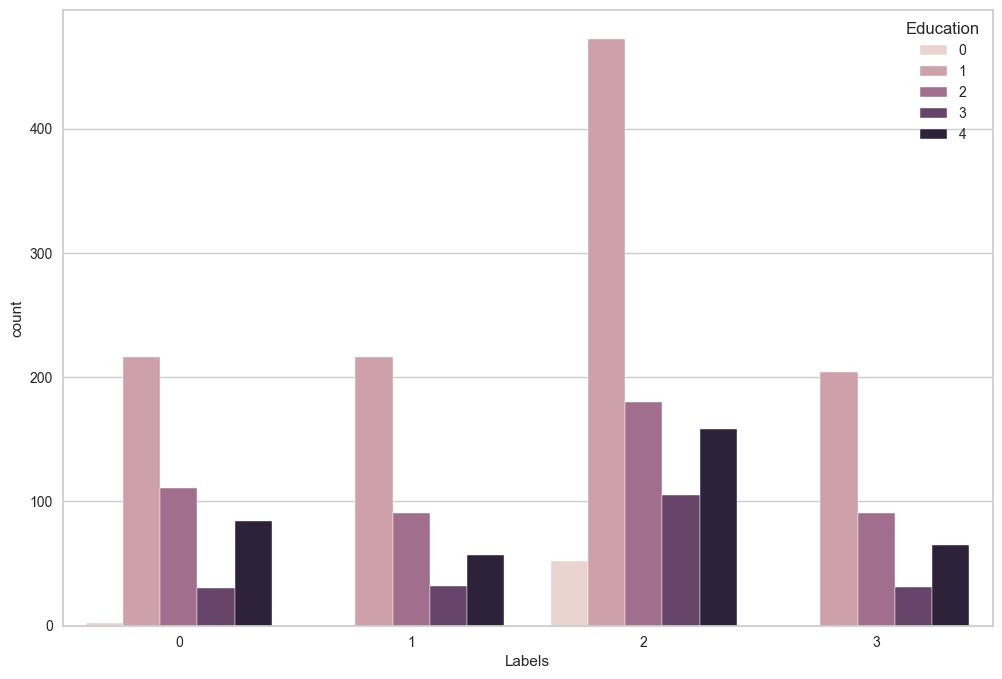

In [613]:
#Education'a göre clusters
plt.figure(figsize = (12, 8))
sns.countplot(x = 'Labels', hue = 'Education', 
              data = cls_data)

Columns Name: Education
************
High School : 0
bachelor : 1
doctor's degree : 2
junior technical college : 3
master degree : 4

<Axes: xlabel='Labels', ylabel='count'>

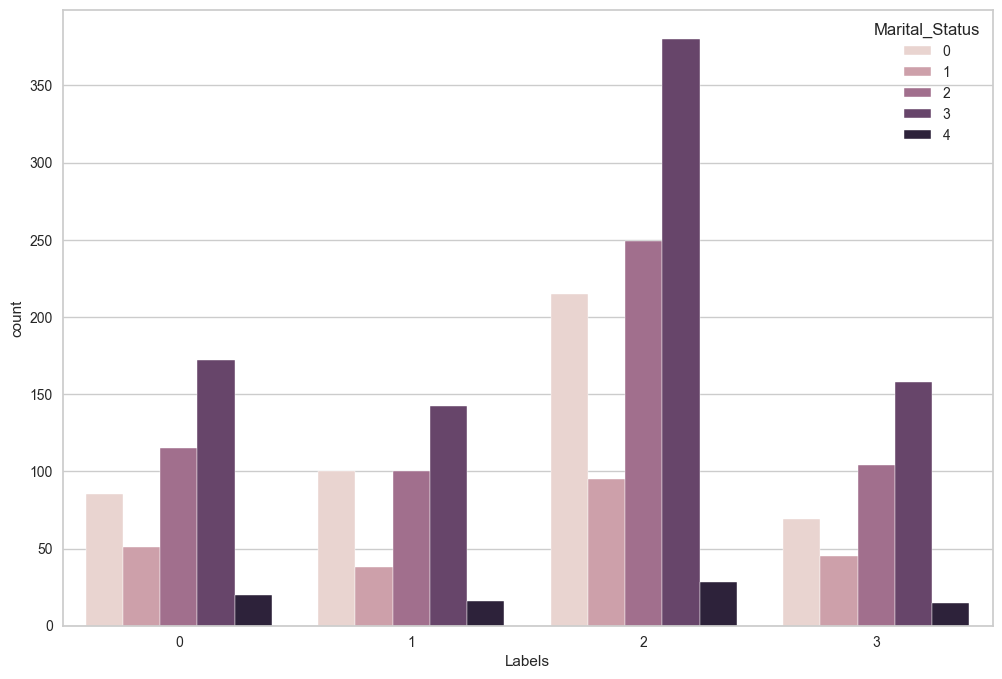

In [614]:
#Medeni Duruma göre clusters
plt.figure(figsize = (12, 8))
sns.countplot(x = 'Labels', hue = 'Marital_Status', 
              data = cls_data)

Columns Name: Marital_Status
************
Other : 0
divorced : 1
engaged : 2
married : 3
widow : 4

<Axes: xlabel='Labels', ylabel='count'>

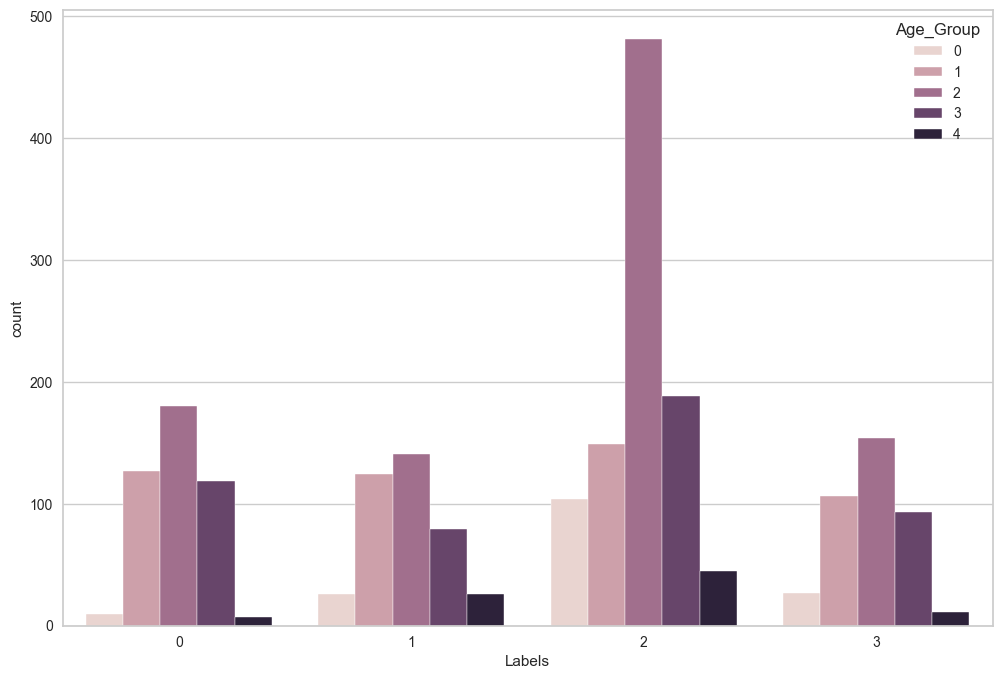

In [615]:
#Yaş Grubuna göre clusters
plt.figure(figsize = (12, 8))
sns.countplot(x = 'Labels', hue = 'Age_Group', 
              data = cls_data)

Columns Name: Age_Group
************
Adult : 0
Elderly : 1
Middle Age : 2
Senior : 3
Young Adult : 4

<Axes: xlabel='Labels', ylabel='count'>

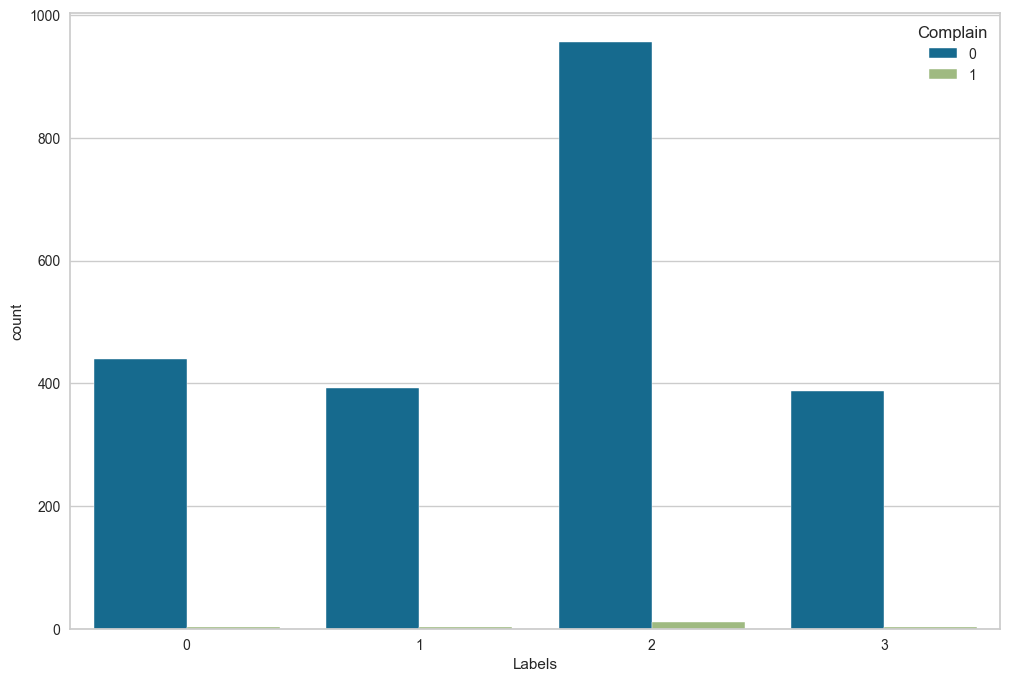

In [616]:
#Şikayetlere göre clusters
plt.figure(figsize = (12, 8))
sns.countplot(x = 'Labels', hue = 'Complain', 
              data = cls_data)

C:\Users\sevgi\AppData\Local\Temp\ipykernel_8708\3052841035.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cls_data, ci=None, palette='viridis',
C:\Users\sevgi\AppData\Local\Temp\ipykernel_8708\3052841035.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cls_data, ci=None, palette='viridis',
C:\Users\sevgi\AppData\Local\Temp\ipykernel_8708\3052841035.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cls_data, ci=None, palette='viridis',
C:\Users\sevgi\AppData\Local\Temp\ipykernel_8708\3052841035.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barpl

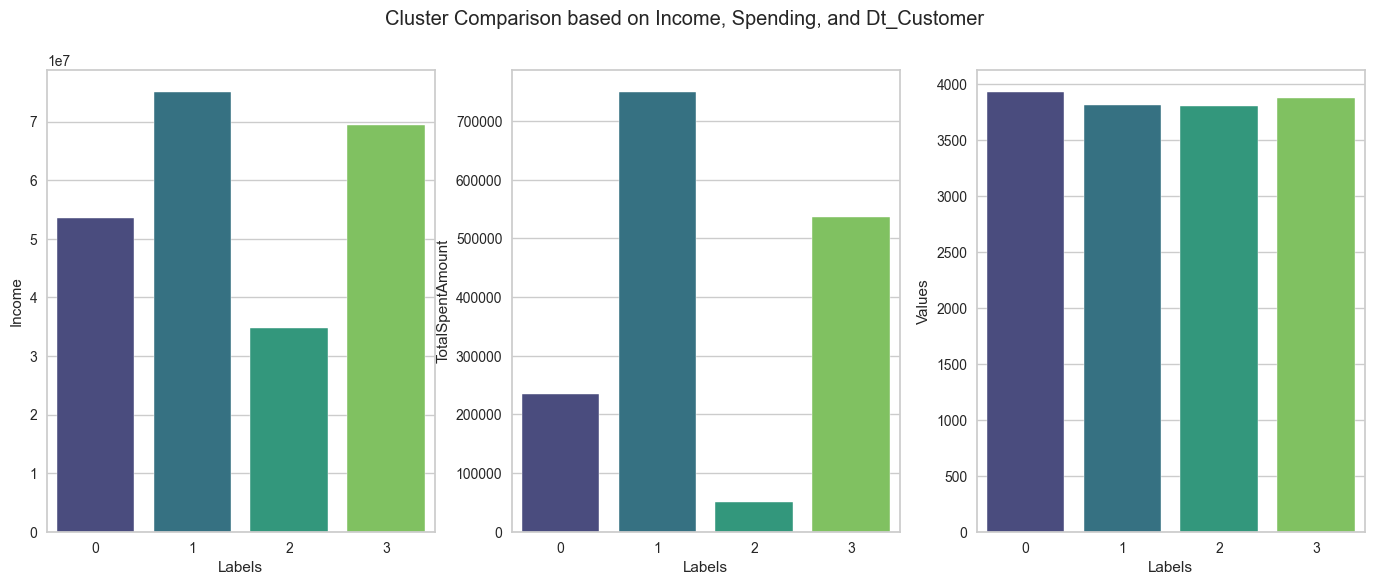

In [617]:

plt.figure(figsize=(17, 6))

sns.barplot(data=cls_data, ci=None, palette='viridis',
            x='Labels', y='Income', ax=plt.subplot(1, 3, 1))

sns.barplot(data=cls_data, ci=None, palette='viridis',
            x='Labels', y='TotalSpentAmount', ax=plt.subplot(1, 3, 2))

sns.barplot(data=cls_data, ci=None, palette='viridis',
            x='Labels', y='NumberofDay', ax=plt.subplot(1, 3, 3))

plt.xlabel('Labels')
plt.ylabel('Values')
plt.suptitle('Cluster Comparison based on Income, Spending, and Dt_Customer')
plt.show()


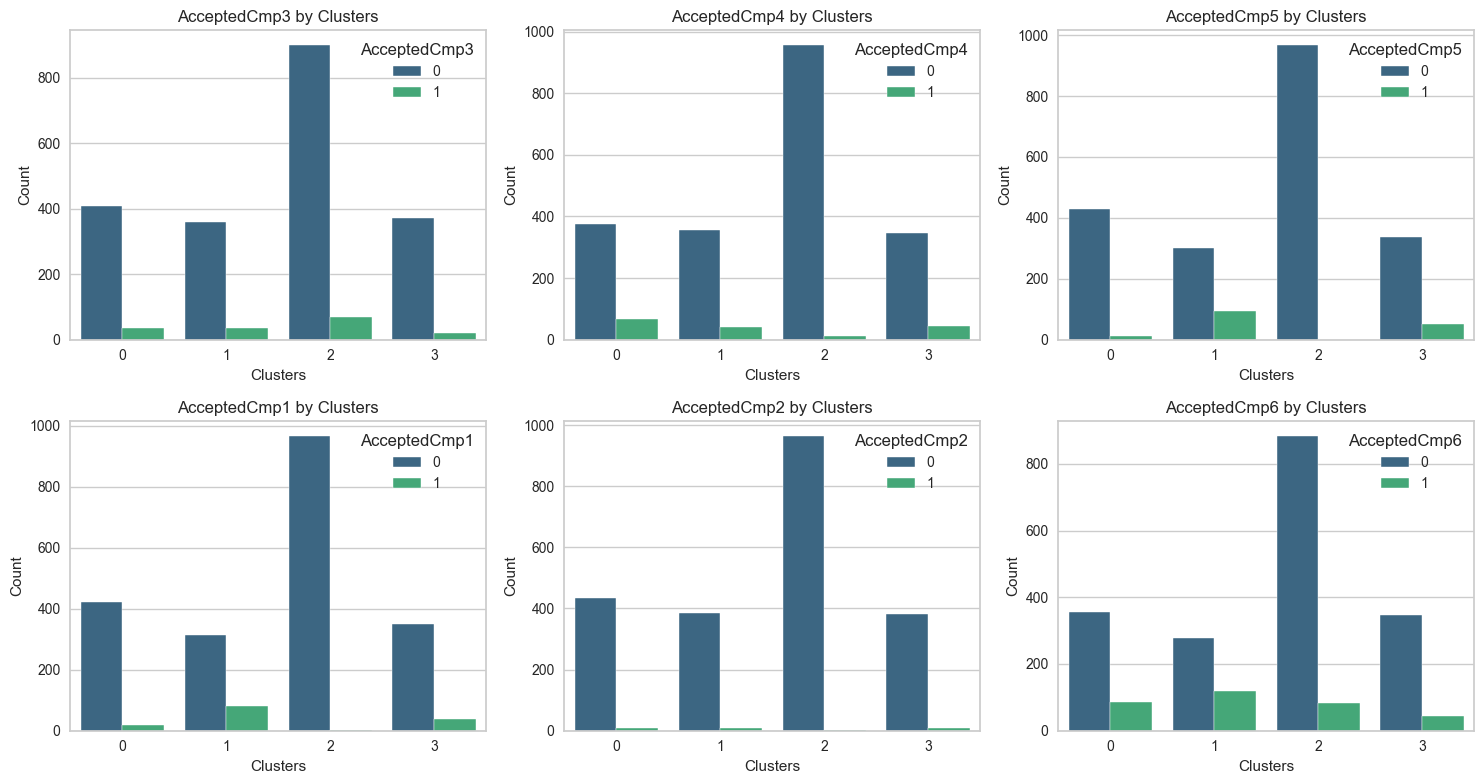

In [618]:
# Her bir AcceptedCmp değişkeni için clusterlara göre grup çubuk grafik oluşturuldu
cmp_variables = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp6']

plt.figure(figsize=(15, 8))

for cmp_variable in cmp_variables:
    plt.subplot(2, 3, cmp_variables.index(cmp_variable) + 1)
    sns.countplot(x='Labels', hue=cmp_variable, data=cls_data, palette='viridis')
    plt.title(f'{cmp_variable} by Clusters')
    plt.xlabel('Clusters')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


- cluster 0: Düşük gelirli alışveriş potansiyelleri düşük, eski müşteri grubu. Uygun hedef değil.
- cluster 1:Yüksek potansiyelli müşteri grubu. Kampanyaları kabul oranları da, gelir seviyeleri de, total harcamaları da daha iyi. Oldukça uygun bir hedef.
- cluster 2: Düşük gelirli, düşük harcamalı, biraz daha yeni olan müşteriler. Evli müşterilerin çoğunlukta olduğu grup. 
- cluster 3: Yüksek gelir seviyeli, ortalamanın üzerinde harcama yapan müşteri grubu. 


### Genel Sonuç
- Modelleri genel olarak değerlendirdiğimizde logistic modellerde önceki kampanya kabullerine göre ve diğer müşteri davranışlarına göre son kampanya teklifi kabulu ayrı ayrı tahmin edilmiştir.
- Clustering modellerinde ise müşteri profillerini daha iyi değerlendirebilmek için önce 3 kümeye sonra 4 kümeye ayrılarak analiz yapılmıştır. 
- Modeller müşteri davranışlarında yüksek gelirli, toplam alışveriş miktarının fazla olduğu ve çocuk sayısı az olan müşterilerde elde edilen gelirin fazla olduğu yönünde bir analiz elde etmemizi sağlamıştır.
